# 1 - Perkenalan

Nama: Tandya Anggergian

Batch: FTDS-10

Dataset: bank-additional-full

# 2 - Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from feature_engine.outliers import Winsorizer
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn import svm
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from matplotlib import rcParams
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# 3 - Data Loading

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
data = pd.read_csv('bank-additional-full.csv', sep = ';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
#Duplicate Dataset

data_copy = data.copy()

In [4]:
#Check Daistribution

data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# 4 - Exploratory Data Analysis (EDA)

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

---
## Dimensi Dataset

In [5]:
data.shape

(41188, 21)

---
## Preview Dataset

In [6]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


---
## Cek Data Type pada Tiap Kolom

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
numerical = [var for var in data.columns if data[var].dtype!='O']

print('Ada {} kolom numerical. \n'.format(len(numerical)))

print('Kolom numerical tersebut adalah:', numerical)

Ada 10 kolom numerical. 

Kolom numerical tersebut adalah: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [9]:
categorical = [var for var in data.columns if data[var].dtype=='O']

print('Ada {} kolom categorical. \n'.format(len(categorical)))

print('Kolom numerical tersebut adalah:', categorical)

Ada 11 kolom categorical. 

Kolom numerical tersebut adalah: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


Dari 21 kolom, ada 10 kolom numerical dan 11 kolom categorical. 

---
## Cek Persentase Missing Value

In [10]:
data.isnull().sum() / data.shape[0] * 100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

Tidak ada missing value yang terdeteksi pada dataset.

---
## Cek Sebaran Data Numerical

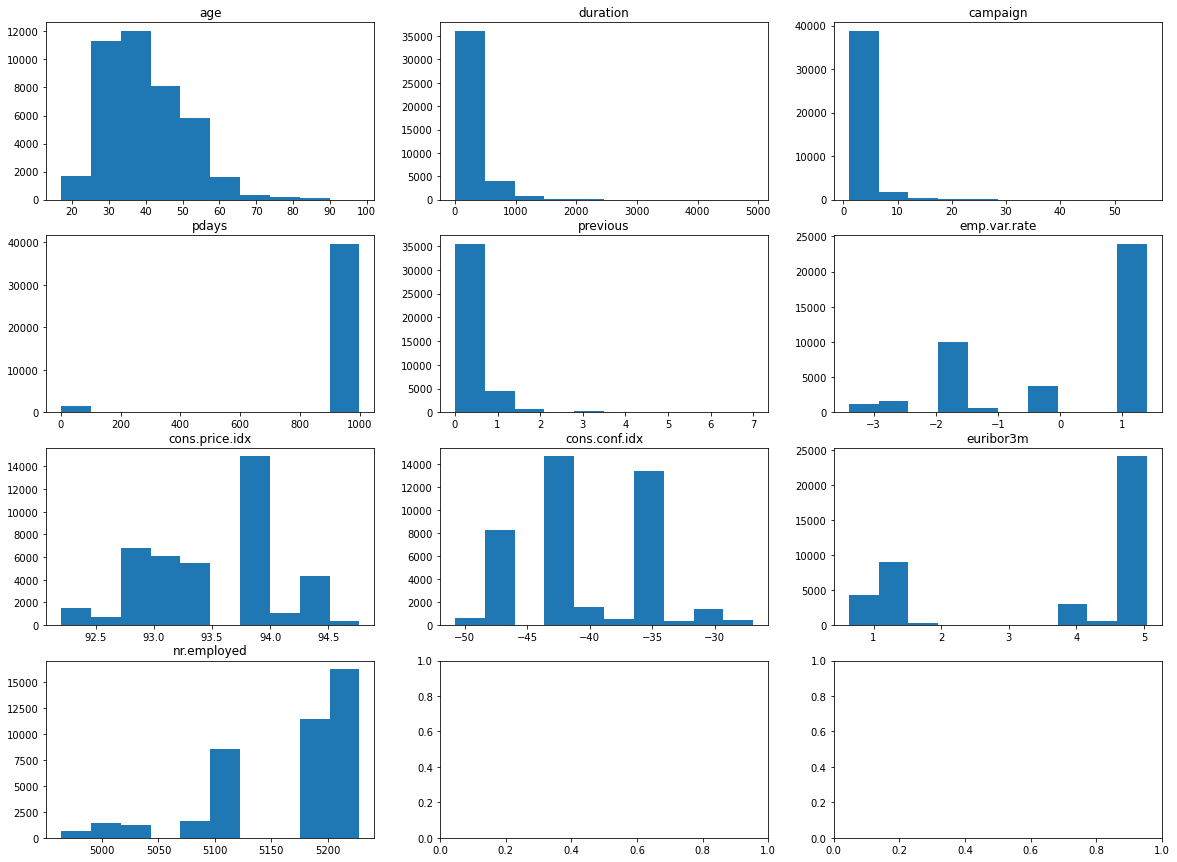

In [11]:
numerical = [var for var in data.columns if data[var].dtype!='O']

fig, axs = plt.subplots(4, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in numerical:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(data[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

Dari plot di atas ada beberapa kolom yang memiliki tingkat outlier yang cukup tinggi yaitu 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'euribor3m', dan 'nr.employed'.

Kolom 'euribor3m' adalah kolom yang menjelaskan tentang refrensi kurs rata-rata suku bunga yang ditawarkan bank untuk dipinjamkan pada bank lainnya dalam bentuk euro.

Karena data ini merupakan rate, maka bisa diasumsikan bahwa data ini bisa dijadikan data categorical. (Untuk saat ini.)

Asumsi yang sama juga diterapkan pada kolom lain yang memiliki rate pada nama kolomnya.

Selanjutnya, dapat ditunjukkan bahwa data numerical memiliki persebaran yang berbeda-beda. Untuk lebih jelasnya lakukan penghitungan skewness.

In [12]:
for column in numerical:
    print(f'\'{data[column].name}\' skewness: {data[column].skew()}')
    if data[column].skew() > 0.5:
        print('right skewed')
    elif data[column].skew() < -0.5:
        print('left skewed')
    else:
        print('normal distribution')

'age' skewness: 0.7846968157646645
right skewed
'duration' skewness: 3.263141255262832
right skewed
'campaign' skewness: 4.762506697067009
right skewed
'pdays' skewness: -4.922189916418162
left skewed
'previous' skewness: 3.8320422428611836
right skewed
'emp.var.rate' skewness: -0.7240955492472556
left skewed
'cons.price.idx' skewness: -0.23088765135788006
normal distribution
'cons.conf.idx' skewness: 0.30317985874819237
normal distribution
'euribor3m' skewness: -0.7091879563778298
left skewed
'nr.employed' skewness: -1.044262407089151
left skewed


Jadi, data numerical yang normal adalah 'cons.price.idx' dan 'cons.conf.idx'. Sedangkan sisanya 'skewed'.

---
## Cek sebaran data categorical

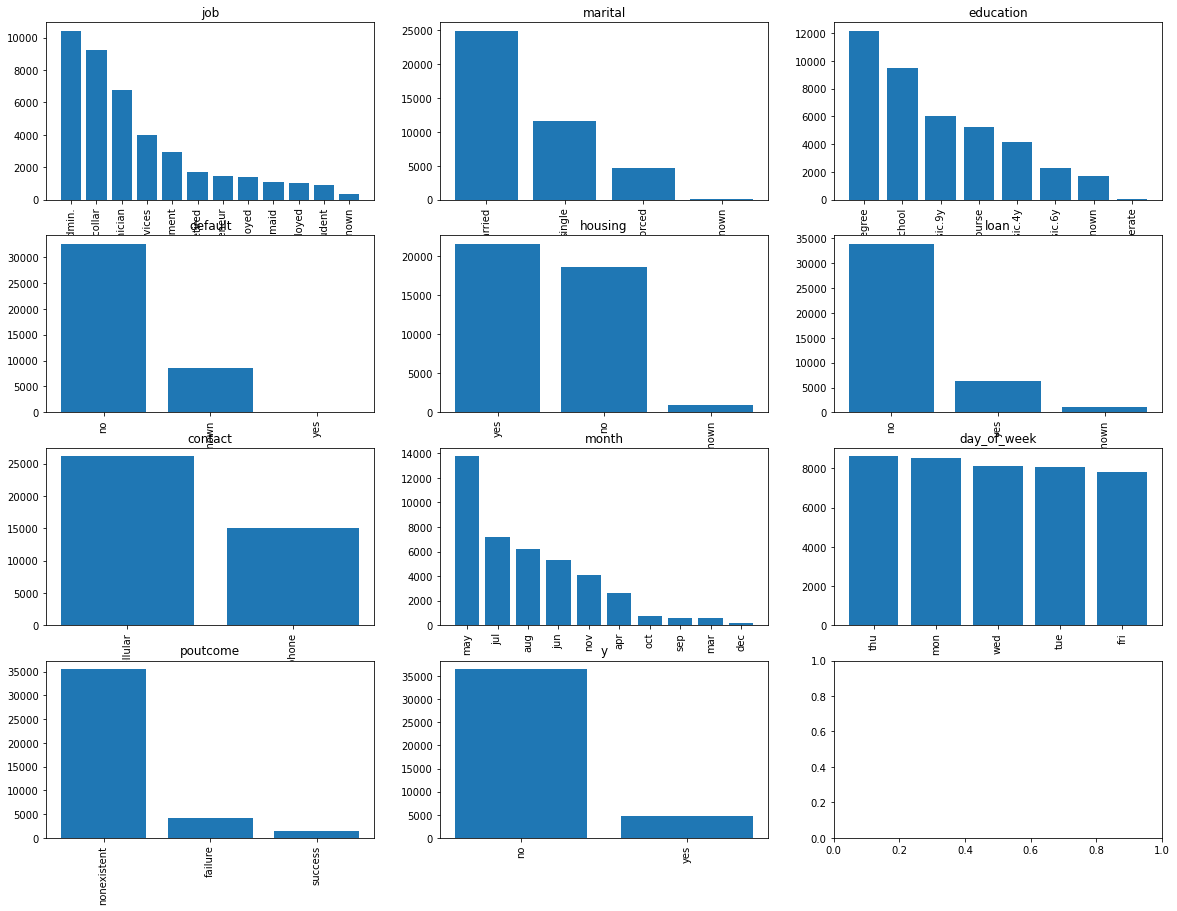

In [13]:
categorical = [var for var in data.columns if data[var].dtype=='O']
fig, axs = plt.subplots(4, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in categorical:
    value_counts = data[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

---
## Cek Properti Statistical Dataset

In [14]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Dengan mengetahui properti statistikal, beberapa info penting sebagai berikut:

### Anomali pada kolom 'pdays'

Jika mengacu pada informasi atribut di source, angka 999 pada 'pdays' artinya klien tersebut sebelumnya belum pernah dihubungi lagi oleh pihak bank setelah campaign sebelumnya.

Kita bisa coba untuk melihat seberapa banyak klien yang sebelumnya belum pernah dihubungi oleh pihak bank.

In [15]:
data['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

Kita cek persentasenya.

In [16]:
data['pdays'].value_counts()/len(data)

999    0.963217
3      0.010658
6      0.010003
4      0.002865
9      0.001554
2      0.001481
7      0.001457
12     0.001408
10     0.001263
5      0.001117
13     0.000874
11     0.000680
1      0.000631
15     0.000583
14     0.000486
8      0.000437
0      0.000364
16     0.000267
17     0.000194
18     0.000170
22     0.000073
19     0.000073
21     0.000049
25     0.000024
26     0.000024
27     0.000024
20     0.000024
Name: pdays, dtype: float64

Ternyata sebagian besar klien belum dihubungi lagi oleh pihak bank setelah campaign sebelumnya selesai.

Dengan banyaknya data dengan nilai 999, ada kemungkinan nantinya kolom ini akan di-drop pada pemilihan fitur.

### Anomali pada kolom 'campaign'

Kolom campaign adalah kolom yang berisi tentang data berapa kali klien dihubungi oleh pihak bank dalam campaign kali ini.

Jumlah maksimal dari kolom ini cukup aneh karena sangat tidak mungkin pihak bank melakukan panggilan hingga 56 kali.

Mari dilihat unique value dan persentasenya.

In [17]:
data['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

Menurut pendapat pribadi, jumlah panggilan hingga lebih dari 25 kali dalam satu campaign dinilai sangat mengganggu, oleh karenanya cek jumlah 'campaign' yang lebih dari 25.

In [18]:
len(data[data['campaign'] > 25]) / len(data) * 100

0.18694765465669613

Ternyata data yang lebih dari 25 cukup sedikit yaitu sekitar 0.19% dan diasumsikan sebagai noise. Oleh karenanya nantinya akan dilakukan pengecekan outlier untuk menentukan apa yang akan dilakukan pada data ini.

### Anomali pada kolom 'previous'

Kolom 'previous' berisi data tentang berapa kali bank melakukan kontak terhadap klien pada campaign yang sebelumnya.

Sebenarnya jumlah 7 kali kontak bisa dibilang tidak aneh, namun dengan jumlah rata-rata yang sangat berbeda dapat diasumsikan ada sesuatu yang janggal pada kolom ini.

In [19]:
data['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

Diambil asumsi 4 kali karena jika bank menghubungi klien lebih dari 4 kali diantara campaign bisa saja hal itu mengganggu klien.

In [20]:
len(data[data['previous'] > 4]) / len(data) * 100

0.05826939885403516

Jumlah data ternyata hanya sekitar 0.06% persen saja sehingga data ini bisa dianggap noise. Ketika melakukan data cleaning, akan dilakukan pengecekan outlier untuk menentukan apa yang akan dilakukan dengan data ini.

Jadi kesimpulannya adalah:

- Ada anomali pada kolom 'pdays' di mana terbanyak banyak sekali nilai 999 (sekitar 96.3% dari total data). Jadi kolom ini akan didrop.
- Ada 0.18% data yang diasumsikan noise pada kolom 'campaign'. Nantinya, akan dilakukan pengecekan outlier untuk menentukan apa yang akan dilakukan dengan data ini.
- Ada 0.05% data yang diasumsikan sebagai noise pada kolom 'previous'. Nantinya, akan dilakukan pengecekan outlier untuk menentukan apa yang akan dilakukan dengan data ini.

---
## Analisa Kolom Target

Pada dataset ini, yang menjadi kolom target adalah kolom 'y'. Kolom 'y' sendiri berisi tentang apakah klien sudah berlangganan deposito berjangka.

Kita gunakan bar plot untuk mengetahui seberapa banyak klien yang berlangganan dan klien yang tidak berlangganan.

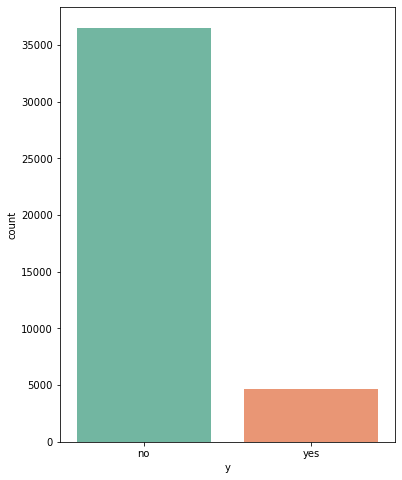

In [21]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x='y', data=data, palette='Set2')
plt.show()

Dapat terlihat bahwa ternyata lebih banyak klien yang tidak berlangganan deposito berjangka daripada klien yang berlangganan deposito berjangka.

Selanjutnya, bisa kita cek dengan kolom lainnya, semisal 'job'

<AxesSubplot:title={'center':'Job dan y'}>

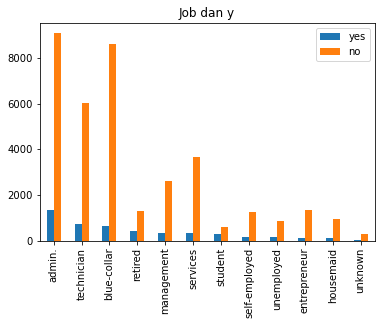

In [22]:
job_y_data = pd.DataFrame()
job_y_data['yes'] = data[data['y']=='yes']['job'].value_counts()
job_y_data['no'] = data[data['y']=='no']['job'].value_counts()

job_y_data.plot.bar(title = 'Job dan y')

Dapat terlihat dari plot tersebut bahwa yang paling banyak tidak berlangganan adalah klien dengan pekerjaan admin dan diikuti blue-collar. 

Sebaliknya, pekerjaan yang paling banyak berlangganan deposito berjangka adalah admin dan technician.

Selanjutnya kita melakukan cek dengan hubungan pernikahan.

<AxesSubplot:title={'center':'Marital dan y'}>

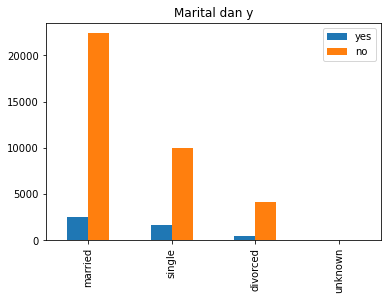

In [23]:
marital_y_data = pd.DataFrame()
marital_y_data['yes'] = data[data['y']=='yes']['marital'].value_counts()
marital_y_data['no'] = data[data['y']=='no']['marital'].value_counts()

marital_y_data.plot.bar(title = 'Marital dan y')

Plot menunjukkan bahwa yang paling banyak berlangganan adalah klien yang menikah dan diikuti dengan klien yang masih bujang.

Begitu juga dengan yang paling banyak tidak berlangganan adalah klien yang menikah dan klien yang masih bujang.

Selanjutnya kita cek dengan tingkat edukasi klien.

<AxesSubplot:title={'center':'Education dan y'}>

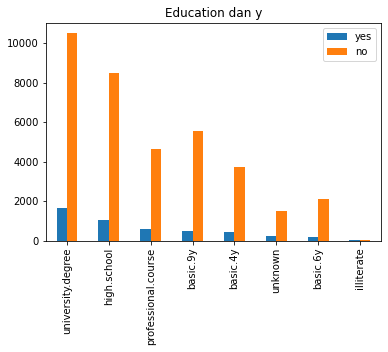

In [24]:
education_y_data = pd.DataFrame()
education_y_data['yes'] = data[data['y']=='yes']['education'].value_counts()
education_y_data['no'] = data[data['y']=='no']['education'].value_counts()

education_y_data.plot.bar(title = 'Education dan y')

Plot menunjukkan bahwa yang paling banyak berlangganan deposito berjangka adalah klien yang pendidikan terakhirnya universitas dan diikuti dengan SMA.

Sedangkan untuk yang tidak berlangganan dipimpin oleh klien dengan tingkat pendidikan terakhir universitas dan diikuti dengan SMA.

Selanjutnya, kita bandingkan dengan bagaimana cara bank melakukan kontak dengan klien.

<AxesSubplot:title={'center':'contact dan y'}>

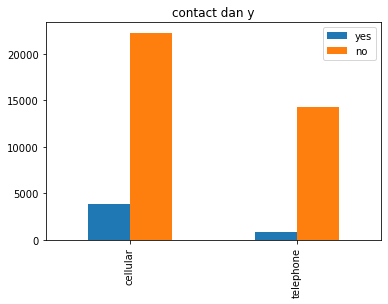

In [25]:
contact_y_data = pd.DataFrame()
contact_y_data['yes'] = data[data['y']=='yes']['contact'].value_counts()
contact_y_data['no'] = data[data['y']=='no']['contact'].value_counts()

contact_y_data.plot.bar(title = 'contact dan y')

Dapat dilihat dari plot bahwa orang yang dihubungi melalui cellular lebih banyak yang belum berlangganan deposito berjangka dibandingkan yang dihubungi melalui telepon.

Jadi dapat disimpulkan bahwa:

- Pekerjaan yang lebih jarang untuk berlangganan deposito berjangka adalah 'admin' dan 'blue-collar'.
- Klien yang sudah menikah lebih jarang untuk berlangganan deposito berjangka.
- Klien dengan tingkat pendidikan terakhir universitas lebih jarang untuk berlangganan deposito berjangka.
- Klien yang dihubungi melalui telepon seluler milik mereka lebih jarang untuk berlangganan deposito berjangka dibandingkan yang dihubungi melalui telepon.

---
# 5. Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

---
## Data Cleaning

Hal yang akan dilakukan pada data cleaning ini adalah:

- Drop data yang sekiranya tidak penting
- Mengubah data yang memiliki value 'yes'/'no' menjadi 1/0. Hal ini dilakukan untuk mempermudah ketika melakukan perhitungan kedepannya. Untuk data yang tidak diketahui valuenya, kita asumsikan sebagai 'no'

Pertama kita buat copy data frame untuk melakukan data cleaning.

In [26]:
data_clean = data.copy()
data_clean

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Selanjutnya kita akan buang kolom yang sekiranya tidak penting.

Kolom tersebut adalah 'pdays' dan 'duration'. Kolom 'duration' dianggap kurang penting karena pada attribute information dinyatakan bahwa kolom in harus dibuang jika ingin membuat model predictive yang realistis.

In [27]:
data_clean = data_clean.drop(['pdays','duration'], axis=1)
data_clean

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Selanjutnya kita akan mengubah nilai 'yes'/'no' menjadi 1/0. Jika ditemukan data selain itu, maka akan diisi dengan value 'no' atau 0.

Mengacu pada attribute information, kolom yang memiliki value yang diinginkan adalah 'default', 'housing', 'loan', dan 'y'.

In [28]:
yn_column = ['default', 'housing', 'loan', 'y']

Selanjutnya kita ubah value pada kolom tersebut.

In [29]:
def boolean_clean(row, column_name):
    if row[column_name] == 'yes':
        return 1
    else:
        return 0

In [30]:
for bool_col in yn_column:
    data_clean[bool_col + '_bool'] = data.apply(lambda row: boolean_clean(row, bool_col),axis=1)

data_clean = data_clean.drop(columns = yn_column)
data_clean

,age,job,marital,education,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default_bool,housing_bool,loan_bool,y_bool
0,56,housemaid,married,basic.4y,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0
1,57,services,married,high.school,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0
2,37,services,married,high.school,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0
3,40,admin.,married,basic.6y,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0
4,56,services,married,high.school,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,1
41184,46,blue-collar,married,professional.course,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0
41185,56,retired,married,university.degree,cellular,nov,fri,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0
41186,44,technician,married,professional.course,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,1


Setelah mendapatkan data_clean, bisa dilakukan proses selanjutnya yaitu mendapatkan data inference.

---
## Data Inference

Hal pertama yang harus dilakukan adalah mendapatkan data inference.

In [31]:
data_inf = data_clean.sample(10, random_state=17)
data_inf

,age,job,marital,education,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default_bool,housing_bool,loan_bool,y_bool
40718,86,retired,married,unknown,cellular,sep,tue,1,4,success,-1.1,94.199,-37.5,0.877,4963.6,0,1,1,1
37511,41,blue-collar,married,basic.9y,cellular,aug,thu,1,1,failure,-2.9,92.201,-31.4,0.873,5076.2,0,0,0,0
546,46,admin.,married,university.degree,telephone,may,tue,2,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0
3545,35,admin.,single,high.school,telephone,may,fri,1,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0,0,1,1
24148,42,services,married,high.school,cellular,nov,mon,1,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0,1,0,0
25959,47,management,married,high.school,cellular,nov,wed,2,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0,1,0,0
35658,39,technician,single,university.degree,cellular,may,mon,1,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,0,1,0,1
1698,31,entrepreneur,married,basic.9y,telephone,may,fri,2,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0,0,0,0
39949,69,retired,divorced,professional.course,telephone,jun,fri,5,0,nonexistent,-1.7,94.055,-39.8,0.748,4991.6,0,1,0,0
30136,58,retired,married,basic.4y,cellular,apr,thu,1,1,success,-1.8,93.075,-47.1,1.365,5099.1,0,1,0,0


Selanjutnya, pisahkan data inference-set dari dataset.

In [32]:
data_train_test = data_clean.drop(data_inf.index)
data_train_test

,age,job,marital,education,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default_bool,housing_bool,loan_bool,y_bool
0,56,housemaid,married,basic.4y,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0
1,57,services,married,high.school,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0
2,37,services,married,high.school,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0
3,40,admin.,married,basic.6y,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0
4,56,services,married,high.school,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,1
41184,46,blue-collar,married,professional.course,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0
41185,56,retired,married,university.degree,cellular,nov,fri,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0
41186,44,technician,married,professional.course,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,1


Lakukan reset index agar nilai index kembali terurut.

In [33]:
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,age,job,marital,education,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default_bool,housing_bool,loan_bool,y_bool
0,86,retired,married,unknown,cellular,sep,tue,1,4,success,-1.1,94.199,-37.5,0.877,4963.6,0,1,1,1
1,41,blue-collar,married,basic.9y,cellular,aug,thu,1,1,failure,-2.9,92.201,-31.4,0.873,5076.2,0,0,0,0
2,46,admin.,married,university.degree,telephone,may,tue,2,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0
3,35,admin.,single,high.school,telephone,may,fri,1,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0,0,1,1
4,42,services,married,high.school,cellular,nov,mon,1,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0,1,0,0
5,47,management,married,high.school,cellular,nov,wed,2,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0,1,0,0
6,39,technician,single,university.degree,cellular,may,mon,1,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,0,1,0,1
7,31,entrepreneur,married,basic.9y,telephone,may,fri,2,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0,0,0,0
8,69,retired,divorced,professional.course,telephone,jun,fri,5,0,nonexistent,-1.7,94.055,-39.8,0.748,4991.6,0,1,0,0
9,58,retired,married,basic.4y,cellular,apr,thu,1,1,success,-1.8,93.075,-47.1,1.365,5099.1,0,1,0,0


Selanjutnya bisa kita lakukan Splitting Dataset.

---
## Splitting Dataset

In [34]:
X = data_train_test.drop('y_bool', axis=1)
y = data_train_test['y_bool']
X

,age,job,marital,education,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default_bool,housing_bool,loan_bool
0,56,housemaid,married,basic.4y,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0
1,57,services,married,high.school,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0
2,37,services,married,high.school,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
3,40,admin.,married,basic.6y,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0
4,56,services,married,high.school,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41173,73,retired,married,professional.course,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,1,0
41174,46,blue-collar,married,professional.course,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,0,0
41175,56,retired,married,university.degree,cellular,nov,fri,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,1,0
41176,44,technician,married,professional.course,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,0,0


Kita pisahkan untuk mendapatkan nilai X_train, X_test, y_train, dan y_test.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print('Train Size: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('Test Size: ', X_test.shape)
print('y_test shape: ', y_test.shape)

Train Size:  (32942, 18)
y_train shape:  (32942,)
Test Size:  (8236, 18)
y_test shape:  (8236,)


Selanjutnya bisa kita lakukan handling outlier.

---
## Handling Outlier

Mencari outlier pada datatype numerical di X_train

In [36]:
numerical = [var for var in X_train.columns if X_train[var].dtype!='O']

print('Ada {} kolom numerical. \n'.format(len(numerical)))

print('Kolom numerical tersebut adalah:', numerical)

Ada 11 kolom numerical. 

Kolom numerical tersebut adalah: ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'default_bool', 'housing_bool', 'loan_bool']


Ada tambahan kolom numerical dibanding ketika dilakukan di EDA karena ada kolom yang valuenya diubah menjadi numerical.

In [37]:
X_train[numerical].head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default_bool,housing_bool,loan_bool
38185,80,1,0,-3.4,92.431,-26.9,0.744,5017.5,0,0,0
32074,45,1,1,-1.8,92.893,-46.2,1.313,5099.1,0,0,1
10699,50,2,0,1.4,94.465,-41.8,4.961,5228.1,0,0,0
11276,43,1,0,1.4,94.465,-41.8,4.961,5228.1,0,0,0
24382,50,1,1,-0.1,93.200,-42.0,4.191,5195.8,0,1,1


Dapat disimpulkan bahwa:

- Terdapat 12 kolom numerical pada X_train.
- Kolom tersebut adalah: 'age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'default_bool', 'housing_bool', 'loan_bool'

Selanjutnya kita cek properti statistik kolom tersebut.

In [38]:
X_train[numerical].describe()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default_bool,housing_bool,loan_bool
count,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000
mean,40.010412,2.559590,0.174610,0.081783,93.574522,-40.486652,3.622417,5167.074455,0.000091,0.522039,0.152389
std,10.399496,2.747185,0.501406,1.573139,0.579327,4.634606,1.734758,72.291063,0.009543,0.499522,0.359403
min,17.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,0.000000,0.000000
50%,38.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,1.000000,0.000000
75%,47.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,1.000000,0.000000
max,98.000000,56.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,1.000000,1.000000


Kita lakukan plot untuk melakukan pengecekan terhadap outlier.

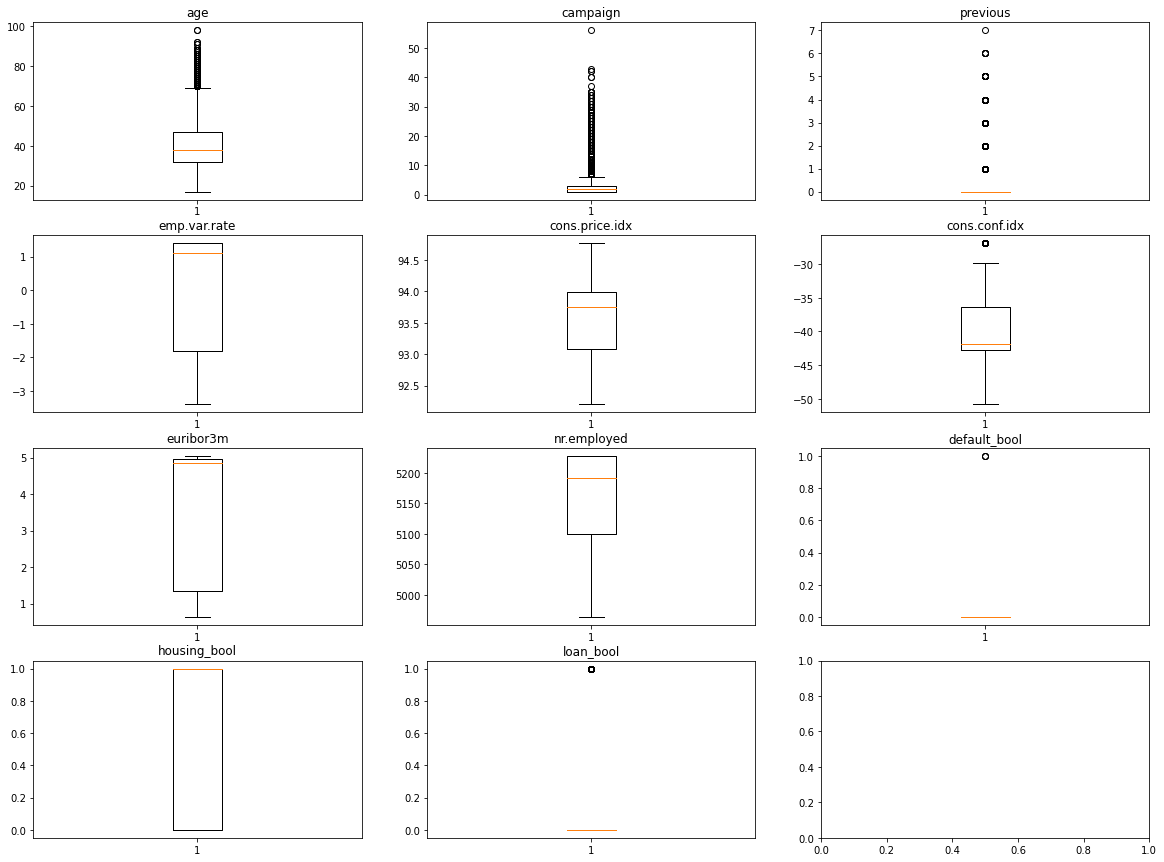

In [39]:
fig, axs = plt.subplots(4, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in numerical:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].boxplot(X_train[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

Dapat terlihat ada beberapa outlier pada data numerical. Selanjutnya lakukan pengecekan persentase jumlah outlier.

In [40]:
Q1 = X_train[numerical].quantile(0.25)
Q3 = X_train[numerical].quantile(0.75)
IQR = Q3 - Q1

((X_train[numerical] < (Q1 - 1.5 * IQR)) | (X_train[numerical] > (Q3 + 1.5 * IQR))).sum()
outlier_sum = (((X_train[numerical] < (Q1 - 1.5 * IQR)) | (X_train[numerical] > (Q3 + 1.5 * IQR))).sum()).sum()

In [41]:
outlier_percentage = (outlier_sum/len(X_train)*100)
print('Persentase outlier pada X_train adalah:', round(outlier_percentage), '%')

Persentase outlier pada X_train adalah: 37 %


Ternyata jumlah outlier pada data numerical X_train adalah 44%. Oleh karena itu, data outlier ini tidak akan di-trimming ataupun di-capping dan akan di-ignore saja.

Selanjutnya kita cari apakah ada missing value pada dataset X_train.

---
## Handling Missing Value

Mencari missing value pada data X_train, X_test, dan data_inf.

---
### Data Numerical

In [42]:
numerical = [var for var in X_train.columns if X_train[var].dtype!='O']

print('Kolom numerical tersebut adalah:', numerical)

Kolom numerical tersebut adalah: ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'default_bool', 'housing_bool', 'loan_bool']


Mencari missing value pada kolom numerical di X_train.

In [43]:
X_train[numerical].isnull().sum()

age               0
campaign          0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
default_bool      0
housing_bool      0
loan_bool         0
dtype: int64

Tidak ada missing value pada kolom numerical di X_train. Selanjutnya cek di X_test.

In [44]:
X_test[numerical].isnull().sum()

age               0
campaign          0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
default_bool      0
housing_bool      0
loan_bool         0
dtype: int64

Tidak ada missing value pada kolom numerical di X_test. Selanjutnya cek di data_inf.

In [45]:
data_inf[numerical].isnull().sum()

age               0
campaign          0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
default_bool      0
housing_bool      0
loan_bool         0
dtype: int64

Tidak ada missing value pada kolom numerical di data_inf. Selanjutnya cek missing value pada kolom dengan data type categorical.

---
### Data Categorical

In [46]:
categorical = [var for var in X_train.columns if X_train[var].dtype=='O']

print('Kolom categorical tersebut adalah:', categorical)

Kolom categorical tersebut adalah: ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']


Mencari missing value pada kolom categorical di X_train.

In [47]:
X_train[categorical].isnull().sum()

job            0
marital        0
education      0
contact        0
month          0
day_of_week    0
poutcome       0
dtype: int64

Tidak ada missing value pada kolom categorical di X_train. Selanjutnya cek di X_test.

In [48]:
X_test[categorical].isnull().sum()

job            0
marital        0
education      0
contact        0
month          0
day_of_week    0
poutcome       0
dtype: int64

Tidak ada missing value pada kolom numerical di X_test. Selanjutnya cek di data_inf.

In [49]:
data_inf[categorical].isnull().sum()

job            0
marital        0
education      0
contact        0
month          0
day_of_week    0
poutcome       0
dtype: int64

Tidak ada missing value pada kolom numerical di data_inf. Selanjutnya feature selection bisa dilakukan.

---
## Feature Selection

Mencari feature yang akan digunakan dalam model. Pemilihan feature akan menggunakan Pearson Correlation.

Pemilihan fitur dilakukan pada X_train.

In [50]:
X_train

,age,job,marital,education,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default_bool,housing_bool,loan_bool
38185,80,retired,divorced,basic.4y,cellular,oct,tue,1,0,nonexistent,-3.4,92.431,-26.9,0.744,5017.5,0,0,0
32074,45,admin.,divorced,professional.course,cellular,may,fri,1,1,failure,-1.8,92.893,-46.2,1.313,5099.1,0,0,1
10699,50,entrepreneur,married,university.degree,telephone,jun,tue,2,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0,0,0
11276,43,blue-collar,divorced,basic.9y,telephone,jun,thu,1,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0,0,0
24382,50,blue-collar,married,basic.9y,cellular,nov,mon,1,1,failure,-0.1,93.200,-42.0,4.191,5195.8,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31044,36,blue-collar,married,basic.6y,cellular,may,wed,1,2,failure,-1.8,92.893,-46.2,1.334,5099.1,0,0,0
25631,53,blue-collar,single,basic.4y,cellular,nov,wed,2,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0,0,0
33174,45,services,married,basic.6y,cellular,may,tue,1,1,failure,-1.8,92.893,-46.2,1.291,5099.1,0,0,0
34959,43,services,married,basic.6y,cellular,may,fri,1,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,0,1,0


Mencari korelasi dengan kolom 'y_bool'

In [51]:
X_train['y'] = y_train
X_train

C:\Users\Tandya\AppData\Local\Temp/ipykernel_1340/4112578916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['y'] = y_train


,age,job,marital,education,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default_bool,housing_bool,loan_bool,y
38185,80,retired,divorced,basic.4y,cellular,oct,tue,1,0,nonexistent,-3.4,92.431,-26.9,0.744,5017.5,0,0,0,0
32074,45,admin.,divorced,professional.course,cellular,may,fri,1,1,failure,-1.8,92.893,-46.2,1.313,5099.1,0,0,1,0
10699,50,entrepreneur,married,university.degree,telephone,jun,tue,2,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0,0,0,0
11276,43,blue-collar,divorced,basic.9y,telephone,jun,thu,1,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0,0,0,0
24382,50,blue-collar,married,basic.9y,cellular,nov,mon,1,1,failure,-0.1,93.200,-42.0,4.191,5195.8,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31044,36,blue-collar,married,basic.6y,cellular,may,wed,1,2,failure,-1.8,92.893,-46.2,1.334,5099.1,0,0,0,0
25631,53,blue-collar,single,basic.4y,cellular,nov,wed,2,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0,0,0,0
33174,45,services,married,basic.6y,cellular,may,tue,1,1,failure,-1.8,92.893,-46.2,1.291,5099.1,0,0,0,0
34959,43,services,married,basic.6y,cellular,may,fri,1,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,0,1,0,0


Kolom education memiliki data ordinal, oleh karena itu akan dilakukan ordinal encoding.

Pertama kita lihat unique value dari kolom education.

In [52]:
X_train['education'].unique()

array(['basic.4y', 'professional.course', 'university.degree', 'basic.9y',
       'high.school', 'unknown', 'basic.6y', 'illiterate'], dtype=object)

Terdapat data unknown pada kolom education. Di sini kita asumsikan bahwa unknown lebih tinggi daripada illiterate karena ada kemungkinan ketika pengisian data ada kesalahan/human error.

In [53]:
education_rating_dict = {'illiterate' : 0, 'unknown' : 1, 'basic.4y' : 2,
                         'basic.6y' : 3, 'basic.9y' : 4, 'high.school' : 5,
                         'professional.course' : 6, 'university.degree' : 7}

X_train['education'] = X_train.education.map(education_rating_dict)

C:\Users\Tandya\AppData\Local\Temp/ipykernel_1340/2313259725.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['education'] = X_train.education.map(education_rating_dict)


In [54]:
X_train

,age,job,marital,education,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default_bool,housing_bool,loan_bool,y
38185,80,retired,divorced,2,cellular,oct,tue,1,0,nonexistent,-3.4,92.431,-26.9,0.744,5017.5,0,0,0,0
32074,45,admin.,divorced,6,cellular,may,fri,1,1,failure,-1.8,92.893,-46.2,1.313,5099.1,0,0,1,0
10699,50,entrepreneur,married,7,telephone,jun,tue,2,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0,0,0,0
11276,43,blue-collar,divorced,4,telephone,jun,thu,1,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0,0,0,0
24382,50,blue-collar,married,4,cellular,nov,mon,1,1,failure,-0.1,93.200,-42.0,4.191,5195.8,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31044,36,blue-collar,married,3,cellular,may,wed,1,2,failure,-1.8,92.893,-46.2,1.334,5099.1,0,0,0,0
25631,53,blue-collar,single,2,cellular,nov,wed,2,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0,0,0,0
33174,45,services,married,3,cellular,may,tue,1,1,failure,-1.8,92.893,-46.2,1.291,5099.1,0,0,0,0
34959,43,services,married,3,cellular,may,fri,1,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,0,1,0,0


Lakukan hal yang sama pada X_test dan data_inf.

In [55]:
X_test['education'] = X_test.education.map(education_rating_dict)
data_inf['education'] = data_inf.education.map(education_rating_dict)

C:\Users\Tandya\AppData\Local\Temp/ipykernel_1340/2559067744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['education'] = X_test.education.map(education_rating_dict)


Cek korelasi kolom numerical dengan kolom y

In [56]:
numerical = [var for var in X_train.columns if X_train[var].dtype!='O']

print('Kolom numerical tersebut adalah:', numerical)

Kolom numerical tersebut adalah: ['age', 'education', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'default_bool', 'housing_bool', 'loan_bool', 'y']


In [57]:
num_y = (['y', 'age', 'education', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'default_bool', 'housing_bool', 'loan_bool'])
data_num_y = X_train[num_y]
data_num_y.head()

,y,age,education,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default_bool,housing_bool,loan_bool
38185,0,80,2,1,0,-3.4,92.431,-26.9,0.744,5017.5,0,0,0
32074,0,45,6,1,1,-1.8,92.893,-46.2,1.313,5099.1,0,0,1
10699,0,50,7,2,0,1.4,94.465,-41.8,4.961,5228.1,0,0,0
11276,0,43,4,1,0,1.4,94.465,-41.8,4.961,5228.1,0,0,0
24382,0,50,4,1,1,-0.1,93.200,-42.0,4.191,5195.8,0,1,1


Selanjutnya cek tingkat korelasinya dengan menggunakan heatmap.

<AxesSubplot:>

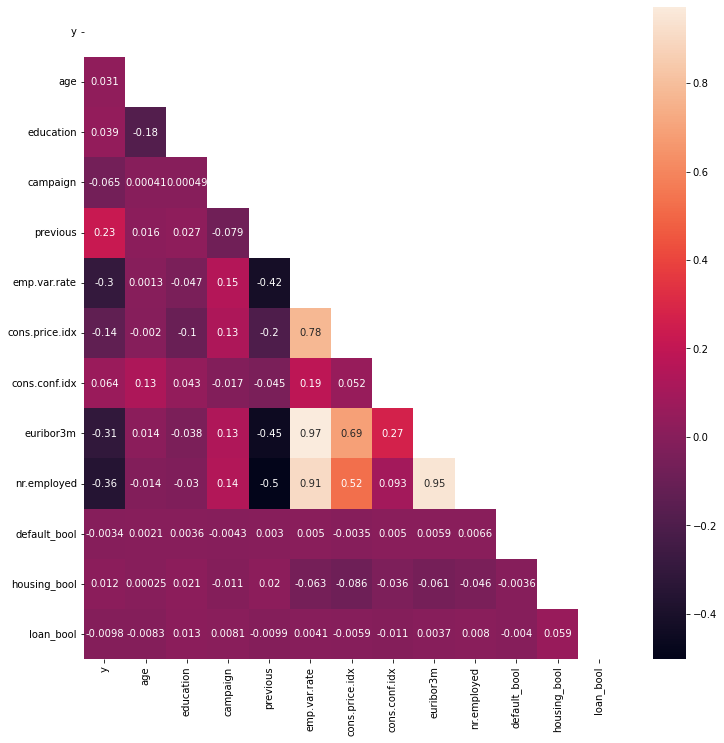

In [58]:
plt.figure(figsize=(12,12))
sb.heatmap(data_num_y.corr(),annot=True, mask=np.triu(data_num_y.corr()))

Disini kita gunakan rentang >0.2 dan <0.2 sehingga kolom yang diasumsikan memiliki korelasi adalah 'previous', 'euribor3m', dan 'nr.employed'.

In [59]:
num_drop = (['age', 'education', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'default_bool', 'housing_bool', 'loan_bool'])

X_train = X_train.drop(num_drop, axis=1)
X_test = X_test.drop(num_drop, axis=1)
data_inf = data_inf.drop(num_drop, axis=1)

X_train.head()

,job,marital,contact,month,day_of_week,previous,poutcome,euribor3m,nr.employed,y
38185,retired,divorced,cellular,oct,tue,0,nonexistent,0.744,5017.5,0
32074,admin.,divorced,cellular,may,fri,1,failure,1.313,5099.1,0
10699,entrepreneur,married,telephone,jun,tue,0,nonexistent,4.961,5228.1,0
11276,blue-collar,divorced,telephone,jun,thu,0,nonexistent,4.961,5228.1,0
24382,blue-collar,married,cellular,nov,mon,1,failure,4.191,5195.8,0


Selanjutnya kita lakukan pengecekan korelasi terhadap kolom-kolom yang merupakan data categorical yang belum dihapus pada langkah sebelumnya. Hal ini dilakukan dengan cara 'one-hot encoding.' Hal ini dilakukan karena data bukan merupakan data ordinal.

In [60]:
categorical = [var for var in X_train.columns if X_train[var].dtype=='O']

print('Kolom categorical tersebut adalah:', categorical)

Kolom categorical tersebut adalah: ['job', 'marital', 'contact', 'month', 'day_of_week', 'poutcome']


In [61]:
cat_col = ['job', 'marital', 'contact', 'month', 'day_of_week', 'poutcome']
for col in cat_col:
    print(np.unique(X_train[col]))

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
['divorced' 'married' 'single' 'unknown']
['cellular' 'telephone']
['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
['fri' 'mon' 'thu' 'tue' 'wed']
['failure' 'nonexistent' 'success']


In [62]:
X_train_dum = pd.get_dummies(X_train, columns=cat_col)
X_train_dum.iloc[10:15]

,previous,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
32039,0,1.327,5099.1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
13354,0,4.962,5228.1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
11147,0,4.961,5228.1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1533,0,4.855,5191.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
30121,0,1.372,5099.1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


Korelasi 'y' dengan 'job'.

In [63]:
job_y = (['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
          'job_management', 'job_retired', 'job_self-employed', 'job_services',
          'job_student', 'job_technician', 'job_unemployed', 'job_unknown'])
data_job_y = X_train_dum[job_y]
data_job_y.head()

,y,job_admin.,job_blue-collar,job_entrepreneur,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
38185,0,0,0,0,0,1,0,0,0,0,0,0
32074,0,1,0,0,0,0,0,0,0,0,0,0
10699,0,0,0,1,0,0,0,0,0,0,0,0
11276,0,0,1,0,0,0,0,0,0,0,0,0
24382,0,0,1,0,0,0,0,0,0,0,0,0


Selanjutnya cek tingkat korelasinya dengan menggunakan heatmap.

<AxesSubplot:>

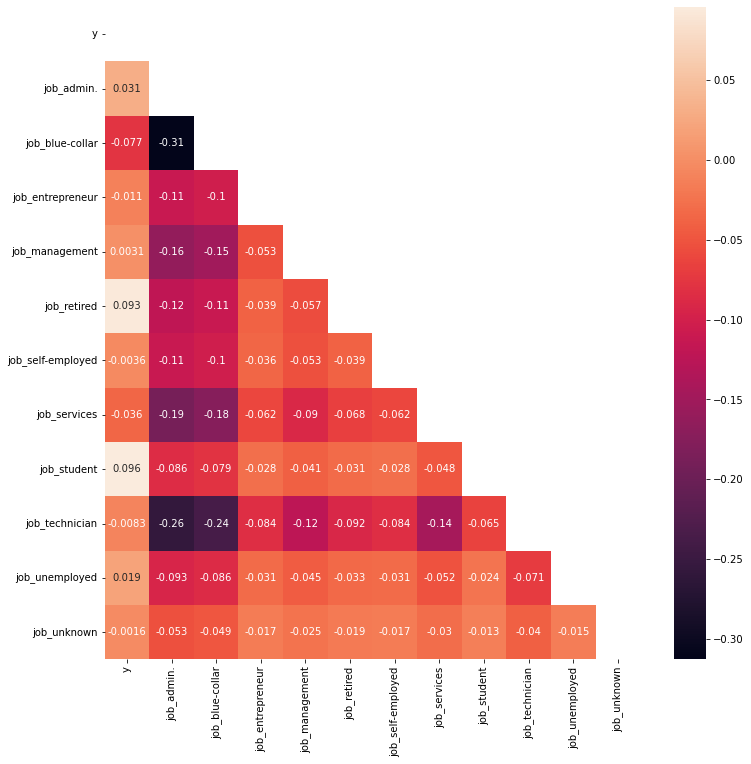

In [64]:
plt.figure(figsize=(12,12))
sb.heatmap(data_job_y.corr(),annot=True, mask=np.triu(data_job_y.corr()))

Ternyata kolom 'job' memiliki korelasi yang rendah terhadap 'y' sehingga kolom job bisa di-drop.

Selanjutnya cek kolom marital status.

In [65]:
marital_y = (['y','marital_divorced', 'marital_married', 'marital_single', 'marital_unknown'])
data_marital_y = X_train_dum[marital_y]
data_marital_y

,y,marital_divorced,marital_married,marital_single,marital_unknown
38185,0,1,0,0,0
32074,0,1,0,0,0
10699,0,0,1,0,0
11276,0,1,0,0,0
24382,0,0,1,0,0
...,...,...,...,...,...
31044,0,0,1,0,0
25631,0,0,0,1,0
33174,0,0,1,0,0
34959,0,0,1,0,0


Selanjutnya cek tingkat korelasinya dengan menggunakan heatmap.

<AxesSubplot:>

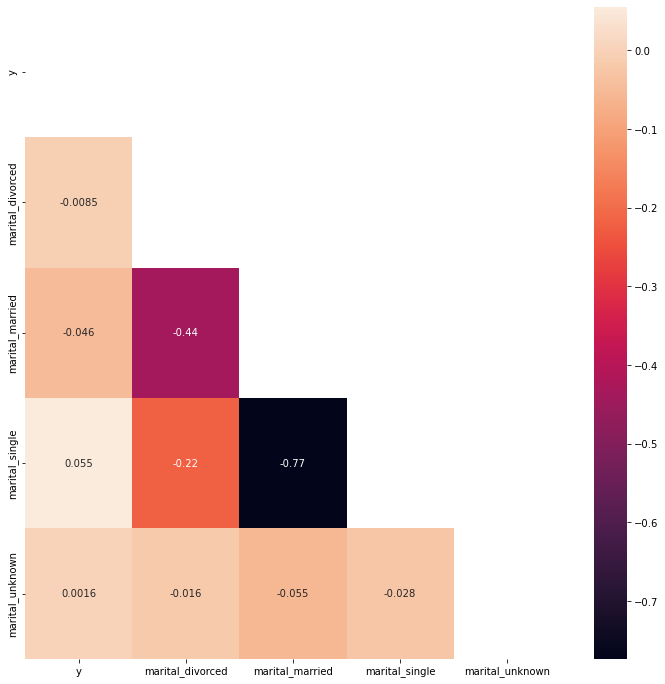

In [66]:
plt.figure(figsize=(12,12))
sb.heatmap(data_marital_y.corr(),annot=True, mask=np.triu(data_marital_y.corr()))

Semuanya ternyata memiliki tingkat korelasi mendekati 0. Maka kolom 'marital' bisa di-drop. Selanjutnya cek kolom 'contact'.

In [67]:
contact_y = (['y','contact_telephone', 'contact_cellular'])
data_contact_y = X_train_dum[contact_y]
data_contact_y

,y,contact_telephone,contact_cellular
38185,0,0,1
32074,0,0,1
10699,0,1,0
11276,0,1,0
24382,0,0,1
...,...,...,...
31044,0,0,1
25631,0,0,1
33174,0,0,1
34959,0,0,1


Selanjutnya cek tingkat korelasinya dengan menggunakan heatmap.

<AxesSubplot:>

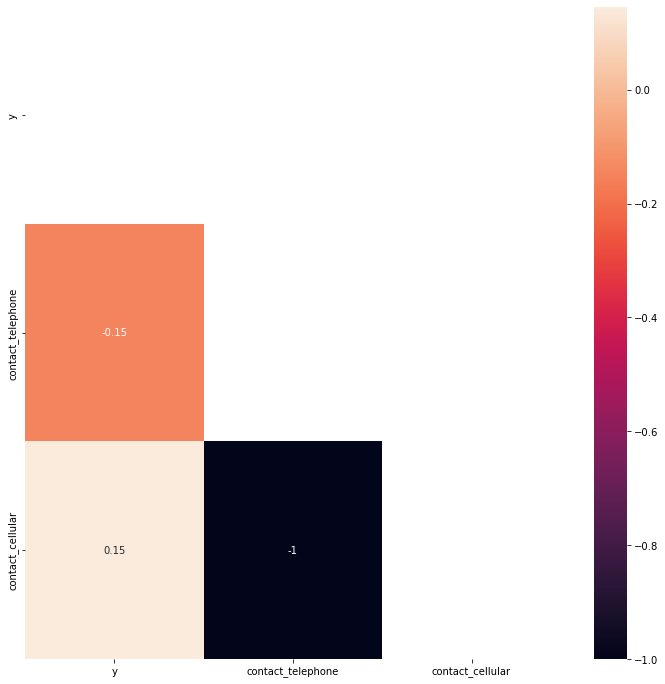

In [68]:
plt.figure(figsize=(12,12))
sb.heatmap(data_contact_y.corr(),annot=True, mask=np.triu(data_contact_y.corr()))

Tingkat korelasi cukup rendah, namun masih memiliki efek sehingga tidak di-drop. Selanjutnya cek kolom 'month'.

In [69]:
month_y = (['y','month_mar', 'month_apr', 'month_may', 'month_jun',
            'month_jul', 'month_aug', 'month_sep', 'month_oct',
            'month_nov', 'month_dec'])
data_month_y = X_train_dum[month_y]
data_month_y

,y,month_mar,month_apr,month_may,month_jun,month_jul,month_aug,month_sep,month_oct,month_nov,month_dec
38185,0,0,0,0,0,0,0,0,1,0,0
32074,0,0,0,1,0,0,0,0,0,0,0
10699,0,0,0,0,1,0,0,0,0,0,0
11276,0,0,0,0,1,0,0,0,0,0,0
24382,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
31044,0,0,0,1,0,0,0,0,0,0,0
25631,0,0,0,0,0,0,0,0,0,1,0
33174,0,0,0,1,0,0,0,0,0,0,0
34959,0,0,0,1,0,0,0,0,0,0,0


Selanjutnya cek tingkat korelasinya dengan menggunakan heatmap.

<AxesSubplot:>

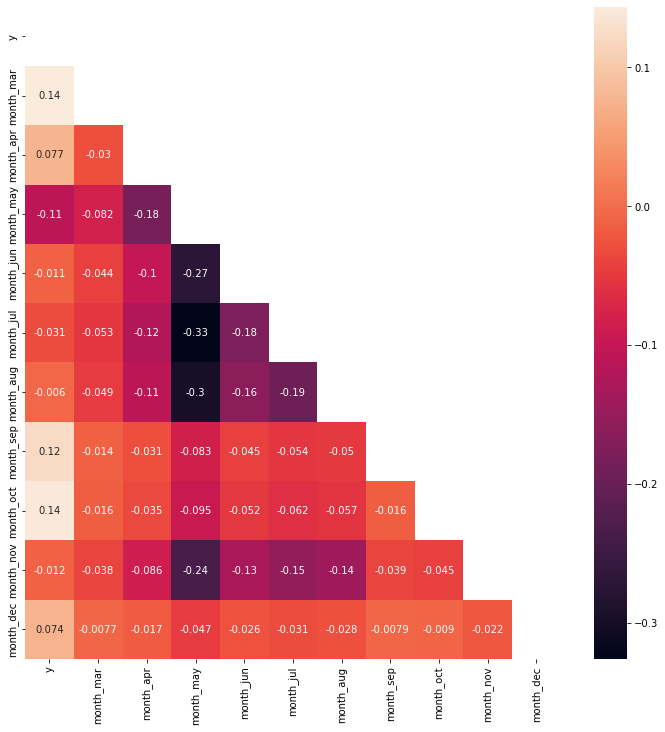

In [70]:
plt.figure(figsize=(12,12))
sb.heatmap(data_month_y.corr(),annot=True, mask=np.triu(data_month_y.corr()))

Sebagian besar data di kolom 'month' memiliki tingkat korelasi yang rendah sehingga bisa di-drop. Selanjutnya cek kolom 'day_of_week'.

In [71]:
day_y = (['y','day_of_week_mon', 'day_of_week_tue', 'day_of_week_wed',
              'day_of_week_thu', 'day_of_week_fri'])
data_day_y = X_train_dum[day_y]
data_day_y

,y,day_of_week_mon,day_of_week_tue,day_of_week_wed,day_of_week_thu,day_of_week_fri
38185,0,0,1,0,0,0
32074,0,0,0,0,0,1
10699,0,0,1,0,0,0
11276,0,0,0,0,1,0
24382,0,1,0,0,0,0
...,...,...,...,...,...,...
31044,0,0,0,1,0,0
25631,0,0,0,1,0,0
33174,0,0,1,0,0,0
34959,0,0,0,0,0,1


Selanjutnya cek tingkat korelasinya dengan menggunakan heatmap.

<AxesSubplot:>

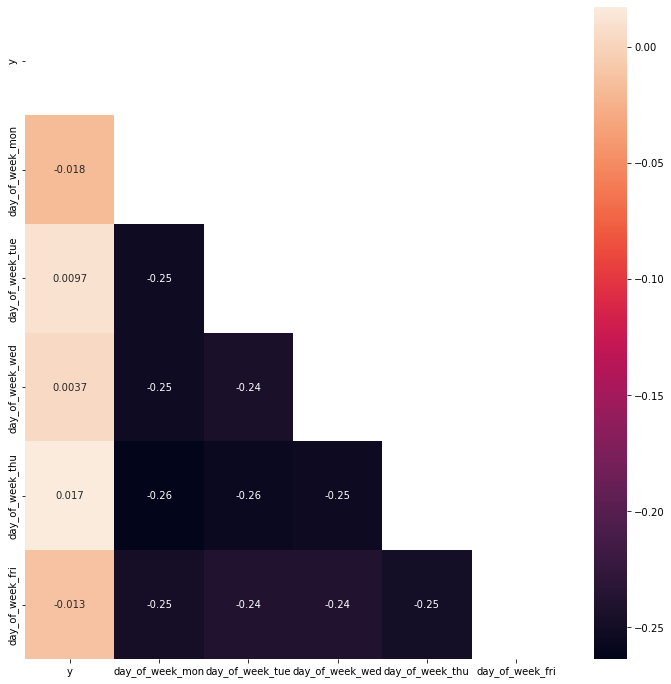

In [72]:
plt.figure(figsize=(12,12))
sb.heatmap(data_day_y.corr(),annot=True, mask=np.triu(data_day_y.corr()))

kolom 'day' memiliki korelasi yang rendah terhadap kolom 'y' sehingga kolom 'day' bisa di-drop. Selanjutnya check kolom 'poutcome'.

In [73]:
poutcome_y = (['y','poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'])
data_poutcome_y = X_train_dum[poutcome_y]
data_poutcome_y

,y,poutcome_failure,poutcome_nonexistent,poutcome_success
38185,0,0,1,0
32074,0,1,0,0
10699,0,0,1,0
11276,0,0,1,0
24382,0,1,0,0
...,...,...,...,...
31044,0,1,0,0
25631,0,0,1,0
33174,0,1,0,0
34959,0,0,1,0


Selanjutnya cek tingkat korelasinya dengan menggunakan heatmap.

<AxesSubplot:>

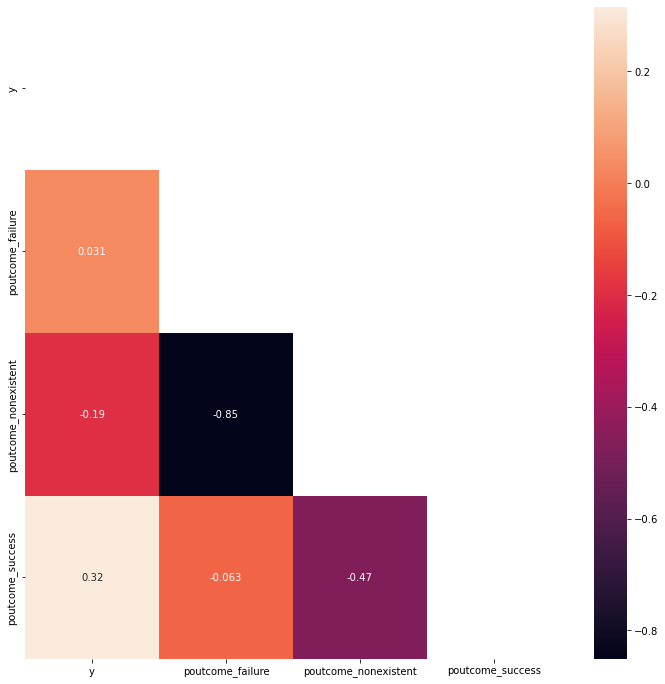

In [74]:
plt.figure(figsize=(12,12))
sb.heatmap(data_poutcome_y.corr(),annot=True, mask=np.triu(data_poutcome_y.corr()))

Ternyata kolom 'poutcome' memiliki korelasi yang cukup baik dengan kolom 'y'. Oleh karenanya kolom 'poutcome' tidak di-drop.

Jadi, kolom categorical yang akan di-drop adalah 'job', 'marital', 'month', 'day_of_week'.

In [75]:
cat_drop = (['job', 'marital', 'month', 'day_of_week'])

X_train = X_train.drop(cat_drop, axis=1)
X_test = X_test.drop(cat_drop, axis=1)
data_inf = data_inf.drop(cat_drop, axis=1)

X_train.head()

,contact,previous,poutcome,euribor3m,nr.employed,y
38185,cellular,0,nonexistent,0.744,5017.5,0
32074,cellular,1,failure,1.313,5099.1,0
10699,telephone,0,nonexistent,4.961,5228.1,0
11276,telephone,0,nonexistent,4.961,5228.1,0
24382,cellular,1,failure,4.191,5195.8,0


Jangan lupa untuk drop kolom 'y' dari X_train.

In [76]:
X_train = X_train.drop('y', axis=1)
X_train

,contact,previous,poutcome,euribor3m,nr.employed
38185,cellular,0,nonexistent,0.744,5017.5
32074,cellular,1,failure,1.313,5099.1
10699,telephone,0,nonexistent,4.961,5228.1
11276,telephone,0,nonexistent,4.961,5228.1
24382,cellular,1,failure,4.191,5195.8
...,...,...,...,...,...
31044,cellular,2,failure,1.334,5099.1
25631,cellular,0,nonexistent,4.120,5195.8
33174,cellular,1,failure,1.291,5099.1
34959,cellular,0,nonexistent,1.250,5099.1


Selanjutnya lakukan splitting antara kolom numerical dan categorical untuk dilakukan scaling dan encoding.

---
### Splitting Antara Kolom Numerical dan Categorical

In [77]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numerical Columns:  ['previous', 'euribor3m', 'nr.employed']
Categorical Columns:  ['contact', 'poutcome']


In [78]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

Setelah dilakukan splitting, kita lanjutkan ke Feature Scaling.

---
### Feature Scaling

In [79]:
X_train

,contact,previous,poutcome,euribor3m,nr.employed
38185,cellular,0,nonexistent,0.744,5017.5
32074,cellular,1,failure,1.313,5099.1
10699,telephone,0,nonexistent,4.961,5228.1
11276,telephone,0,nonexistent,4.961,5228.1
24382,cellular,1,failure,4.191,5195.8
...,...,...,...,...,...
31044,cellular,2,failure,1.334,5099.1
25631,cellular,0,nonexistent,4.120,5195.8
33174,cellular,1,failure,1.291,5099.1
34959,cellular,0,nonexistent,1.250,5099.1


Untuk menentukan metode scaling, kita cek tingkat skewnya.

In [80]:
X_train[num_columns].skew()

previous       3.890562
euribor3m     -0.711291
nr.employed   -1.044637
dtype: float64

Ternyata semua datanya skew sehingga MinMaxScaler akan digunakan.

In [81]:
scaler =  MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.        , 0.02493766, 0.20378072],
       [0.14285714, 0.15393335, 0.51228733],
       [0.        , 0.9809567 , 1.        ],
       ...,
       [0.14285714, 0.14894582, 0.51228733],
       [0.        , 0.13965087, 0.51228733],
       [0.        , 0.98118341, 1.        ]])

Selanjutnya kita lakukan feature encoding.

---
### Feature Encoding

Metode encoding yang digunkan adalah OneHotEncoder karena tidak ada data ordinal pada X_train.

In [82]:
encoder = OneHotEncoder(handle_unknown='ignore')

X_train_cat_enc = pd.DataFrame(encoder.fit_transform(X_train_cat[['contact', 'poutcome']]).toarray())
X_test_cat_enc = pd.DataFrame(encoder.transform(X_test_cat[['contact', 'poutcome']]).toarray())
X_train_cat_enc.columns = ['contact_cellular', 'contact_telephone', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']
X_test_cat_enc.columns = ['contact_cellular', 'contact_telephone', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']
X_train_cat_enc

,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
32937,1.0,0.0,1.0,0.0,0.0
32938,1.0,0.0,0.0,1.0,0.0
32939,1.0,0.0,1.0,0.0,0.0
32940,1.0,0.0,0.0,1.0,0.0


In [83]:
cat_final_columns = X_train_cat_enc.columns.tolist()

Setelah mendapatkan nilai dari data categorical dan numerical, kita akan gabung kedua data.

---
### Concat Kolom Numerical dan Categorical

In [84]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_enc], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_enc], axis=1)

X_train_final

array([[0.        , 0.02493766, 0.20378072, ..., 0.        , 1.        ,
        0.        ],
       [0.14285714, 0.15393335, 0.51228733, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.9809567 , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.14285714, 0.14894582, 0.51228733, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.13965087, 0.51228733, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.98118341, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [85]:
X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + cat_final_columns])
X_train_final_df

,previous,euribor3m,nr.employed,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.000000,0.024938,0.203781,1.0,0.0,0.0,1.0,0.0
1,0.142857,0.153933,0.512287,1.0,0.0,1.0,0.0,0.0
2,0.000000,0.980957,1.000000,0.0,1.0,0.0,1.0,0.0
3,0.000000,0.980957,1.000000,0.0,1.0,0.0,1.0,0.0
4,0.142857,0.806393,0.877883,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
32937,0.285714,0.158694,0.512287,1.0,0.0,1.0,0.0,0.0
32938,0.000000,0.790297,0.877883,1.0,0.0,0.0,1.0,0.0
32939,0.142857,0.148946,0.512287,1.0,0.0,1.0,0.0,0.0
32940,0.000000,0.139651,0.512287,1.0,0.0,0.0,1.0,0.0


Data untuk model sudah siap. Selanjutnua kita buat modelnya.

---
# 6 - Model Definition

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

Ada tujuh algoritma yang akan dipakai pada Milestone 1, yaitu Logistic Regression, SVM, Decission Tree, Random Forest, KNN, Naive Bayes dan XGBoost.

In [88]:
model_log_reg = LogisticRegression(random_state=17)
model_svm = svm.SVC(random_state=17)
model_dec_tree = DecisionTreeClassifier(random_state=17)
model_rand_for = RandomForestClassifier(random_state=17)
model_knn = KNeighborsClassifier()
model_nb = GaussianNB()
model_xgb = xgb.XGBClassifier(random_state=17)

---
# 7 - Model Training

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

---
## Logistic Regression

In [89]:
model_log_reg.fit(X_train_final, y_train)

LogisticRegression(random_state=17)

---
## SVM

In [90]:
model_svm.fit(X_train_final, y_train)

SVC(random_state=17)

---
## Decission Tree

In [91]:
model_dec_tree.fit(X_train_final, y_train)

DecisionTreeClassifier(random_state=17)

---
## Random Forest Classifier

In [92]:
model_rand_for.fit(X_train_final, y_train)

RandomForestClassifier(random_state=17)

---
## KNN

In [93]:
model_knn.fit(X_train_final, y_train)

KNeighborsClassifier()

---
## Naive Bayes

In [94]:
model_nb.fit(X_train_final, y_train)

GaussianNB()

---
## XGBoost

In [95]:
model_xgb.fit(X_train_final, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=17,
              reg_alpha=0, reg_lambda=1, ...)

---
# 8.1 - Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

---
## Logistic Regression

In [96]:
y_pred_train_log = model_log_reg.predict(X_train_final)
y_pred_test_log = model_log_reg.predict(X_test_final)

In [97]:
score = accuracy_score(y_test, y_pred_test_log)
print('Accuracy:', score)

Accuracy: 0.8959446333171442


Tingkat keakurasian logistic regression adalah 89,6% dengan confusion matrix sebagai berikut.

In [98]:
cm_log = metrics.confusion_matrix(y_test, y_pred_test_log)
print(cm_log)

[[7218   73]
 [ 784  161]]


In [100]:
TPLog = 7218
TNLog = 161
FPLog = 73
FNLog = 784

Jadi nilai confusion matriksnya adalah:

- True Positive : 7218
- True Negative :  161
- False Positive:   73
- False Negative:  784

In [101]:
data_true = TPLog + TNLog
data_false = FPLog + FNLog
print('Jadi ada ' , data_true, ' data dengan prediksi benar dan ', data_false, ' data dengan prediksi salah.')

Jadi ada  7379  data dengan prediksi benar dan  857  data dengan prediksi salah.


---
### Precission

Precision didefinisikan sebagai ratio antara data positif yang berhasilkan ditemukan dan dibandingkan dengan semua data positif(baik yang benar maupun yang salah).

Rumus untuk mencari Precission adalah:

Precision = True Positive/True Positive + False Positive

Precision = TP/TP+FP

In [102]:
precission = TPLog/(TPLog + FPLog)
print('Tingkat precission Logistic Regression adalah: ', precission)

Tingkat precission Logistic Regression adalah:  0.9899876560142642


Model logistic regression memiliki tingkat precision sebesar 0.98 atau berhasil menebak hasil positif sebesar 98%.

---
### Recall

Recall didefinisikan sebagai data positif yang berhasil ditemukan dan dibandingkan dengan jumlah total data positif (true positive dan false negative).

Recall mengukur kemampuan model untuk melakukan deteksi terhadap sample positif.

Rumus untuk mencari Recall adalah;

Recall = True Positive/True Positive + False Negative

Recall = TP/TP+FN

In [103]:
recall = TPLog/(TPLog + FNLog)
print('Tingkat recall Logistic Regression adalah: ', recall)

Tingkat recall Logistic Regression adalah:  0.9020244938765308


Model logistic regression memiliki tingkat recall sebesar 0.90 atau berhasil menebak dengan benar sebesar 90%.

---
### ROC Curve

In [104]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_test_log)

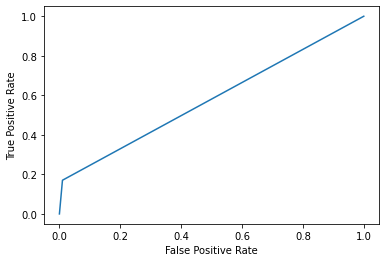

In [105]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Model yang baik adalah model yang mendekati ke arah pojok kiri dari plot. Jika dilihat dari plot di atas, model ini masih kurang bagus untuk melakukan klasifikasi data menjadi kategori.

Untuk menjadikan kuantitas, lakukan kalkulasi AUC untuk mencari seberapa banyak plot yang ada di bawah kurva.

---
### Kalkulasi AUC

Model yang baik adalah model yang memiliki AUC mendekati 1. (Source: https://www.statology.org/plot-roc-curve-python/)

Klasifikasi AUC adalah:

- 0.5 = No discrimination
- 0.5-0.7 = Poor discrimination
- 0.7-0.8 = Acceptable discrimination
- 0.8-0.9= Excellent discrimination
- lebih dari 0.9 = Outstanding discrimination

In [106]:
auc = metrics.roc_auc_score(y_test, y_pred_test_log)

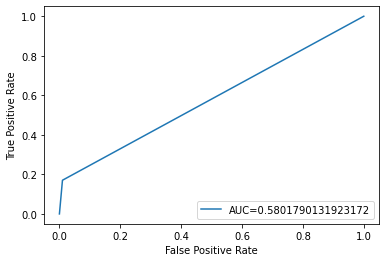

In [107]:
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Dari plot tersebut dapat terlihat bahwa AUC-nya adalah 0.58. Sehingga bisa dimasukkan ke kategori Poor discrimination.

---
### Cross Validation

In [108]:
scores_log_reg = (cross_val_score(model_log_reg, X_train_final, y_train, scoring="f1", cv = 10))
mean_score_log_reg = cross_val_score(model_log_reg, X_train_final, y_train, scoring="f1", cv = 10).mean()
std_score_log_reg = cross_val_score(model_log_reg, X_train_final, y_train, scoring="f1", cv = 10).std()
print("Scores: ", scores_log_reg)
print("Mean: ", mean_score_log_reg)
print("Standard deviation: " ,std_score_log_reg)

Scores:  [0.29424307 0.29645094 0.29583333 0.33195021 0.3375     0.32510288
 0.29237288 0.2832618  0.26373626 0.30669546]
Mean:  0.3027146843310479
Standard deviation:  0.021782682222050063


Dapat dilihat dari score cross validation bahwa nilainya berada di rentang 0.3027 ± 0.0217.

Akan tetapi, ada beberapa score yang berada di atas rentang tersebut.

---
## SVM

In [109]:
y_pred_train_svm = model_svm.predict(X_train_final)
y_pred_test_svm = model_svm.predict(X_test_final)

In [110]:
score = accuracy_score(y_test, y_pred_test_svm)
print('Accuracy:', score)

Accuracy: 0.8972802331228752


Tingkat keakurasian SVM adalah 89,7% dengan confusion matrix sebagai berikut.

In [111]:
cm_svm = metrics.confusion_matrix(y_test, y_pred_test_svm)
print(cm_svm)

[[7244   47]
 [ 799  146]]


In [113]:
TPsvm = 7244
TNsvm = 146
FPsvm = 47
FNsvm = 799

Jadi nilai confusion matriksnya adalah:

- True Positive : 7244
- True Negative :  146
- False Positive:   47
- False Negative:  799

In [114]:
data_true = TPsvm + TNsvm
data_false = FPsvm + FNsvm
print('Jadi ada ' , data_true, ' data dengan prediksi benar dan ', data_false, ' data dengan prediksi salah.')

Jadi ada  7390  data dengan prediksi benar dan  846  data dengan prediksi salah.


---
### Precission

Precision didefinisikan sebagai ratio antara data positif yang berhasilkan ditemukan dan dibandingkan dengan semua data positif(baik yang benar maupun yang salah).

Rumus untuk mencari Precission adalah:

Precision = True Positive/True Positive + False Positive

Precision = TP/TP+FP

In [115]:
precission = TPsvm/(TPsvm + FPsvm)
print('Tingkat precission SVM adalah: ', precission)

Tingkat precission SVM adalah:  0.9935536963379509


Model SVM memiliki tingkat precision sebesar 0.99 atau berhasil menebak hasil positif sebesar 99%.

---
### Recall

Recall didefinisikan sebagai data positif yang berhasil ditemukan dan dibandingkan dengan jumlah total data positif (true positive dan false negative).

Recall mengukur kemampuan model untuk melakukan deteksi terhadap sample positif.

Rumus untuk mencari Recall adalah;

Recall = True Positive/True Positive + False Negative

Recall = TP/TP+FN

In [116]:
recall = TPsvm/(TPsvm + FNsvm)
print('Tingkat recall SVM adalah: ', recall)

Tingkat recall SVM adalah:  0.9006589581002113


Model SVM memiliki tingkat recall sebesar 0.90 atau berhasil menebak dengan benar sebesar 90%.

---
### ROC Curve

In [117]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_test_svm)

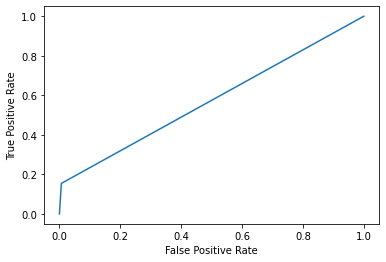

In [118]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Model yang baik adalah model yang mendekati ke arah pojok kiri dari plot. Jika dilihat dari plot di atas, model ini masih kurang bagus untuk melakukan klasifikasi data menjadi kategori.

Untuk menjadikan kuantitas, lakukan kalkulasi AUC untuk mencari seberapa banyak plot yang ada di bawah kurva.

---
### Kalkulasi AUC

Model yang baik adalah model yang memiliki AUC mendekati 1. (Source: https://www.statology.org/plot-roc-curve-python/)

Klasifikasi AUC adalah:

- 0.5 = No discrimination
- 0.5-0.7 = Poor discrimination
- 0.7-0.8 = Acceptable discrimination
- 0.8-0.9= Excellent discrimination
- lebih dari 0.9 = Outstanding discrimination

In [119]:
auc = metrics.roc_auc_score(y_test, y_pred_test_svm)

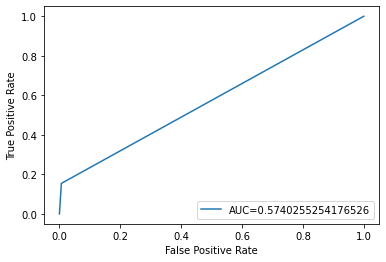

In [120]:
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Dari plot tersebut dapat terlihat bahwa AUC-nya adalah 0.57. Sehingga bisa dimasukkan ke kategori Poor discrimination.

---
### Cross Validation

In [121]:
scores_svm = (cross_val_score(model_svm, X_train_final, y_train, scoring="f1", cv = 10))
mean_score_svm = cross_val_score(model_svm, X_train_final, y_train, scoring="f1", cv = 10).mean()
std_score_svm = cross_val_score(model_svm, X_train_final, y_train, scoring="f1", cv = 10).std()
print("Scores: ", scores_svm)
print("Mean: ", mean_score_svm)
print("Standard deviation: " ,std_score_svm)

Scores:  [0.28333333 0.28450106 0.29106029 0.28008753 0.30165289 0.31732777
 0.27155172 0.29067245 0.23660714 0.32467532]
Mean:  0.2881469514922029
Standard deviation:  0.023272922741293237


Dapat dilihat dari score cross validation bahwa nilainya berada di rentang 0.2881 ± 0.0232.

Akan tetapi, ada beberapa score yang berada di atas rentang tersebut. Akan tetapi, scorenya lebih baik daripada logistic regression.

---
## Decission Tree

In [122]:
y_pred_train_dt = model_dec_tree.predict(X_train_final)
y_pred_test_dt = model_dec_tree.predict(X_test_final)

In [123]:
score = accuracy_score(y_test, y_pred_test_dt)
print('Accuracy:', score)

Accuracy: 0.8899951432734337


Tingkat keakurasian Decission Tree adalah 89,9% dengan confusion matrix sebagai berikut.

In [124]:
cm_dt = metrics.confusion_matrix(y_test, y_pred_test_dt)
print(cm_dt)

[[7143  148]
 [ 758  187]]


In [125]:
TPdt = 7142
TNdt = 187
FPdt = 149
FNdt = 758

Jadi nilai confusion matriksnya adalah:

- True Positive : 7142
- True Negative :  187
- False Positive:  149
- False Negative:  758

In [126]:
data_true = TPdt + TNdt
data_false = FPdt + FNdt
print('Jadi ada ' , data_true, ' data dengan prediksi benar dan ', data_false, ' data dengan prediksi salah.')

Jadi ada  7329  data dengan prediksi benar dan  907  data dengan prediksi salah.


---
### Precission

Precision didefinisikan sebagai ratio antara data positif yang berhasilkan ditemukan dan dibandingkan dengan semua data positif(baik yang benar maupun yang salah).

Rumus untuk mencari Precission adalah:

Precision = True Positive/True Positive + False Positive

Precision = TP/TP+FP

In [127]:
precission = TPdt/(TPdt + FPdt)
print('Tingkat precission Decission Tree adalah: ', precission)

Tingkat precission Decission Tree adalah:  0.9795638458373337


Model decission tree memiliki tingkat precision sebesar 0.97 atau berhasil menebak hasil positif sebesar 97%.

---
### Recall

Recall didefinisikan sebagai data positif yang berhasil ditemukan dan dibandingkan dengan jumlah total data positif (true positive dan false negative).

Recall mengukur kemampuan model untuk melakukan deteksi terhadap sample positif.

Rumus untuk mencari Recall adalah;

Recall = True Positive/True Positive + False Negative

Recall = TP/TP+FN

In [128]:
recall = TPdt/(TPdt + FNdt)
print('Tingkat recall Decission Tree adalah: ', recall)

Tingkat recall Decission Tree adalah:  0.9040506329113924


Model Decission Tree memiliki tingkat recall sebesar 0.90 atau berhasil menebak dengan benar sebesar 90%.

---
### ROC Curve

In [129]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_test_dt)

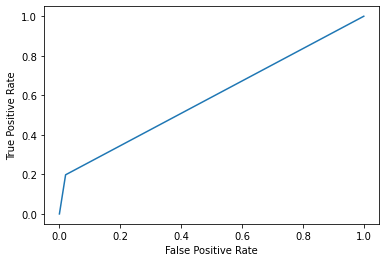

In [130]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Model yang baik adalah model yang mendekati ke arah pojok kiri dari plot. Jika dilihat dari plot di atas, model ini masih kurang bagus untuk melakukan klasifikasi data menjadi kategori.

Untuk menjadikan kuantitas, lakukan kalkulasi AUC untuk mencari seberapa banyak plot yang ada di bawah kurva.

---
### Kalkulasi AUC

Model yang baik adalah model yang memiliki AUC mendekati 1. (Source: https://www.statology.org/plot-roc-curve-python/)

Klasifikasi AUC adalah:

- 0.5 = No discrimination
- 0.5-0.7 = Poor discrimination
- 0.7-0.8 = Acceptable discrimination
- 0.8-0.9= Excellent discrimination
- lebih dari 0.9 = Outstanding discrimination

In [131]:
auc = metrics.roc_auc_score(y_test, y_pred_test_dt)

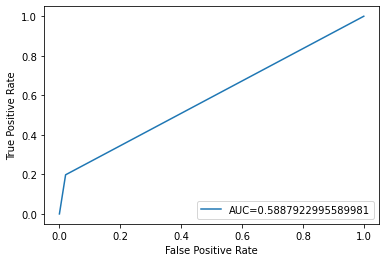

In [132]:
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Dari plot tersebut dapat terlihat bahwa AUC-nya adalah 0.588. Sehingga bisa dimasukkan ke kategori Poor discrimination.

---
### Cross Validation

In [133]:
scores_dt = (cross_val_score(model_dec_tree, X_train_final, y_train, scoring="f1", cv = 10))
mean_score_dt = cross_val_score(model_dec_tree, X_train_final, y_train, scoring="f1", cv = 10).mean()
std_score_dt = cross_val_score(model_dec_tree, X_train_final, y_train, scoring="f1", cv = 10).std()
print("Scores: ", scores_dt)
print("Mean: ", mean_score_dt)
print("Standard deviation: " ,std_score_dt)

Scores:  [0.35114504 0.3219697  0.29745597 0.3915547  0.36046512 0.35564054
 0.33864542 0.35205993 0.30677291 0.3201581 ]
Mean:  0.33958674125272603
Standard deviation:  0.026877392628101408


Dapat dilihat dari score cross validation bahwa nilainya berada di rentang 0.3395 ± 0.0266.

Akan tetapi, cukup banyak score yang berada di luar rentang tersebut. Sehingga diasumsikan model ini kurang bagus.

---
## Random Forest

In [134]:
y_pred_train_rf = model_rand_for.predict(X_train_final)
y_pred_test_rf = model_rand_for.predict(X_test_final)

In [135]:
score = accuracy_score(y_test, y_pred_test_rf)
print('Accuracy:', score)

Accuracy: 0.8907236522583779


Tingkat keakurasian random forest adalah 89,1% dengan confusion matrix sebagai berikut.

In [136]:
cm_rf = metrics.confusion_matrix(y_test, y_pred_test_rf)
print(cm_rf)

[[7119  172]
 [ 728  217]]


In [137]:
TPrf = 7119
TNrf = 221
FPrf = 173
FNrf = 724

Jadi nilai confusion matriksnya adalah:

- True Positive : 7119
- True Negative :  221
- False Positive:  173
- False Negative:  724

In [138]:
data_true = TPrf + TNrf
data_false = FPrf + FNrf
print('Jadi ada ' , data_true, ' data dengan prediksi benar dan ', data_false, ' data dengan prediksi salah.')

Jadi ada  7340  data dengan prediksi benar dan  897  data dengan prediksi salah.


---
### Precission

Precision didefinisikan sebagai ratio antara data positif yang berhasilkan ditemukan dan dibandingkan dengan semua data positif(baik yang benar maupun yang salah).

Rumus untuk mencari Precission adalah:

Precision = True Positive/True Positive + False Positive

Precision = TP/TP+FP

In [139]:
precission = TPrf/(TPrf + FPrf)
print('Tingkat precission random forest adalah: ', precission)

Tingkat precission random forest adalah:  0.9762753702687877


Model random forest memiliki tingkat precision sebesar 0.97 atau berhasil menebak hasil positif sebesar 97%.

---
### Recall

Recall didefinisikan sebagai data positif yang berhasil ditemukan dan dibandingkan dengan jumlah total data positif (true positive dan false negative).

Recall mengukur kemampuan model untuk melakukan deteksi terhadap sample positif.

Rumus untuk mencari Recall adalah;

Recall = True Positive/True Positive + False Negative

Recall = TP/TP+FN

In [140]:
recall = TPrf/(TPrf + FNrf)
print('Tingkat recall random forest adalah: ', recall)

Tingkat recall random forest adalah:  0.9076883845467296


Model Decission Tree memiliki tingkat recall sebesar 0.91 atau berhasil menebak dengan benar sebesar 91%.

---
### ROC Curve

In [141]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_test_rf)

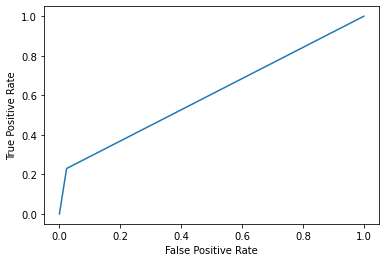

In [142]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Model yang baik adalah model yang mendekati ke arah pojok kiri dari plot. Jika dilihat dari plot di atas, model ini masih kurang bagus untuk melakukan klasifikasi data menjadi kategori.

Untuk menjadikan kuantitas, lakukan kalkulasi AUC untuk mencari seberapa banyak plot yang ada di bawah kurva.

---
### Kalkulasi AUC

Model yang baik adalah model yang memiliki AUC mendekati 1. (Source: https://www.statology.org/plot-roc-curve-python/)

Klasifikasi AUC adalah:

- 0.5 = No discrimination
- 0.5-0.7 = Poor discrimination
- 0.7-0.8 = Acceptable discrimination
- 0.8-0.9= Excellent discrimination
- lebih dari 0.9 = Outstanding discrimination

In [143]:
auc = metrics.roc_auc_score(y_test, y_pred_test_rf)

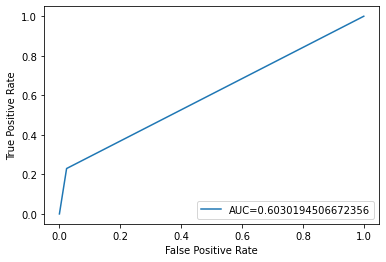

In [144]:
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Dari plot tersebut dapat terlihat bahwa AUC-nya adalah 0.6. Sehingga bisa dimasukkan ke kategori Poor discrimination.

---
### Cross Validation

In [145]:
scores_rf = (cross_val_score(model_rand_for, X_train_final, y_train, scoring="f1", cv = 10))
mean_score_rf = cross_val_score(model_rand_for, X_train_final, y_train, scoring="f1", cv = 10).mean()
std_score_rf = cross_val_score(model_rand_for, X_train_final, y_train, scoring="f1", cv = 10).std()
print("Scores: ", scores_rf)
print("Mean: ", mean_score_rf)
print("Standard deviation: " ,std_score_rf)

Scores:  [0.36734694 0.35906643 0.32786885 0.39851024 0.40808824 0.39266055
 0.34042553 0.38129496 0.33648393 0.34682081]
Mean:  0.36585664835013654
Standard deviation:  0.0267765137863508


Dapat dilihat dari score cross validation bahwa nilainya berada di rentang 0.3641 ± 0.0235.

Akan tetapi, cukup banyak score yang berada di luar rentang tersebut. Sehingga diasumsikan model ini kurang bagus.

---
## KNN

In [146]:
y_pred_train_knn = model_knn.predict(X_train_final)
y_pred_test_knn = model_knn.predict(X_test_final)

In [147]:
score = accuracy_score(y_test, y_pred_test_knn)
print('Accuracy:', score)

Accuracy: 0.8925449247207382


Tingkat keakurasian KNN adalah 89,3% dengan confusion matrix sebagai berikut.

In [148]:
cm_knn = metrics.confusion_matrix(y_test, y_pred_test_knn)
print(cm_knn)

[[7072  219]
 [ 666  279]]


In [150]:
TPknn = 7072
TNknn = 279
FPknn = 219
FNknn = 666

Jadi nilai confusion matriksnya adalah:

- True Positive : 7072
- True Negative :  279
- False Positive:  219
- False Negative:  666

In [151]:
data_true = TPknn + TNknn
data_false = FPknn + FNknn
print('Jadi ada ' , data_true, ' data dengan prediksi benar dan ', data_false, ' data dengan prediksi salah.')

Jadi ada  7351  data dengan prediksi benar dan  885  data dengan prediksi salah.


---
### Precission

Precision didefinisikan sebagai ratio antara data positif yang berhasilkan ditemukan dan dibandingkan dengan semua data positif(baik yang benar maupun yang salah).

Rumus untuk mencari Precission adalah:

Precision = True Positive/True Positive + False Positive

Precision = TP/TP+FP

In [152]:
precission = TPknn/(TPknn + FPknn)
print('Tingkat precission KNN adalah: ', precission)

Tingkat precission KNN adalah:  0.9699629680427925


Model KNN memiliki tingkat precision sebesar 0.97 atau berhasil menebak hasil positif sebesar 97%.

---
### Recall

Recall didefinisikan sebagai data positif yang berhasil ditemukan dan dibandingkan dengan jumlah total data positif (true positive dan false negative).

Recall mengukur kemampuan model untuk melakukan deteksi terhadap sample positif.

Rumus untuk mencari Recall adalah;

Recall = True Positive/True Positive + False Negative

Recall = TP/TP+FN

In [153]:
recall = TPknn/(TPknn + FNknn)
print('Tingkat recall KNN adalah: ', recall)

Tingkat recall KNN adalah:  0.9139312483845955


Model KNN memiliki tingkat recall sebesar 0.913 atau berhasil menebak dengan benar sebesar 91%.

---
### ROC Curve

In [154]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_test_knn)

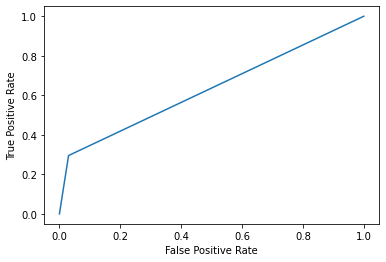

In [155]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Model yang baik adalah model yang mendekati ke arah pojok kiri dari plot. Jika dilihat dari plot di atas, model ini lebih bagus daripada model-model sebelumnya.

Untuk menjadikan kuantitas, lakukan kalkulasi AUC untuk mencari seberapa banyak plot yang ada di bawah kurva.

---
### Kalkulasi AUC

Model yang baik adalah model yang memiliki AUC mendekati 1. (Source: https://www.statology.org/plot-roc-curve-python/)

Klasifikasi AUC adalah:

- 0.5 = No discrimination
- 0.5-0.7 = Poor discrimination
- 0.7-0.8 = Acceptable discrimination
- 0.8-0.9= Excellent discrimination
- lebih dari 0.9 = Outstanding discrimination

In [156]:
auc = metrics.roc_auc_score(y_test, y_pred_test_knn)

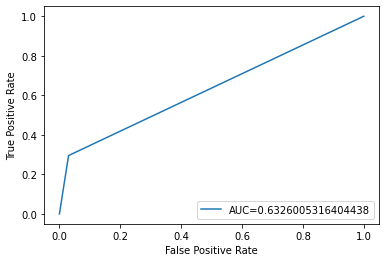

In [157]:
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Dari plot tersebut dapat terlihat bahwa AUC-nya adalah 0.63. Sehingga bisa dimasukkan ke kategori Poor discrimination.

---
### Cross Validation

In [158]:
scores_knn = (cross_val_score(model_knn, X_train_final, y_train, scoring="f1", cv = 10))
mean_score_knn = cross_val_score(model_knn, X_train_final, y_train, scoring="f1", cv = 10).mean()
std_score_knn = cross_val_score(model_knn, X_train_final, y_train, scoring="f1", cv = 10).std()
print("Scores: ", scores_knn)
print("Mean: ", mean_score_knn)
print("Standard deviation: " ,std_score_knn)

Scores:  [0.38181818 0.39932318 0.34990792 0.39783002 0.39784946 0.38979964
 0.38879159 0.37630662 0.33807829 0.41502683]
Mean:  0.3834731737336755
Standard deviation:  0.022292112216609858


Dapat dilihat dari score cross validation bahwa nilainya berada di rentang 0.3843 ± 0.0222.

Akan tetapi, cukup banyak score yang berada di luar rentang tersebut. Sehingga diasumsikan model ini kurang bagus.

---
## Naive Bayes

In [159]:
y_pred_train_nb = model_nb.predict(X_train_final)
y_pred_test_nb = model_nb.predict(X_test_final)

In [160]:
score = accuracy_score(y_test, y_pred_test_nb)
print('Accuracy:', score)

Accuracy: 0.8257649344341913


Tingkat keakurasian Naive Bayes adalah 82,6% dengan confusion matrix sebagai berikut.

In [161]:
cm_nb = metrics.confusion_matrix(y_test, y_pred_test_nb)
print(cm_nb)

[[6444  847]
 [ 588  357]]


In [162]:
TPnb = 5444
TNnb = 357
FPnb = 847
FNnb = 588

Jadi nilai confusion matriksnya adalah:

- True Positive : 7072
- True Negative :  279
- False Positive:  219
- False Negative:  666

In [163]:
data_true = TPnb + TNnb
data_false = FPnb + FNnb
print('Jadi ada ' , data_true, ' data dengan prediksi benar dan ', data_false, ' data dengan prediksi salah.')

Jadi ada  5801  data dengan prediksi benar dan  1435  data dengan prediksi salah.


---
### Precission

Precision didefinisikan sebagai ratio antara data positif yang berhasilkan ditemukan dan dibandingkan dengan semua data positif(baik yang benar maupun yang salah).

Rumus untuk mencari Precission adalah:

Precision = True Positive/True Positive + False Positive

Precision = TP/TP+FP

In [164]:
precission = TPnb/(TPnb + FPnb)
print('Tingkat precission Naive Bayes adalah: ', precission)

Tingkat precission Naive Bayes adalah:  0.8653632172945478


Model Naive Bayes memiliki tingkat precision sebesar 0.86 atau berhasil menebak hasil positif sebesar 86%.

---
### Recall

Recall didefinisikan sebagai data positif yang berhasil ditemukan dan dibandingkan dengan jumlah total data positif (true positive dan false negative).

Recall mengukur kemampuan model untuk melakukan deteksi terhadap sample positif.

Rumus untuk mencari Recall adalah;

Recall = True Positive/True Positive + False Negative

Recall = TP/TP+FN

In [165]:
recall = TPnb/(TPnb + FNnb)
print('Tingkat recall Naive Bayes adalah: ', recall)

Tingkat recall Naive Bayes adalah:  0.9025198938992043


Model KNN memiliki tingkat recall sebesar 0.902 atau berhasil menebak dengan benar sebesar 90%.

---
### ROC Curve

In [166]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_test_nb)

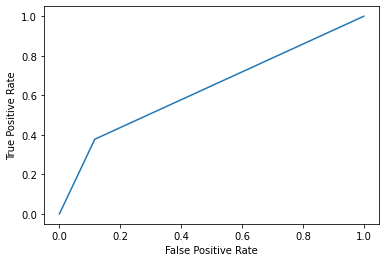

In [167]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Model yang baik adalah model yang mendekati ke arah pojok kiri dari plot. Jika dilihat dari plot di atas, model ini juga termasuk bagus daripada model-model sebelumnya.

Untuk menjadikan kuantitas, lakukan kalkulasi AUC untuk mencari seberapa banyak plot yang ada di bawah kurva.

---
### Kalkulasi AUC

Model yang baik adalah model yang memiliki AUC mendekati 1. (Source: https://www.statology.org/plot-roc-curve-python/)

Klasifikasi AUC adalah:

- 0.5 = No discrimination
- 0.5-0.7 = Poor discrimination
- 0.7-0.8 = Acceptable discrimination
- 0.8-0.9= Excellent discrimination
- lebih dari 0.9 = Outstanding discrimination

In [168]:
auc = metrics.roc_auc_score(y_test, y_pred_test_nb)

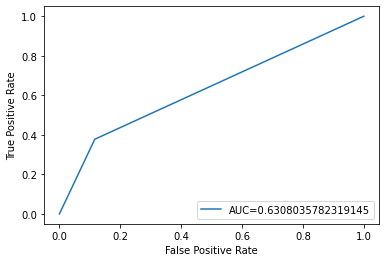

In [169]:
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Dari plot tersebut dapat terlihat bahwa AUC-nya adalah 0.63. Sehingga bisa dimasukkan ke kategori Poor discrimination.

---
### Cross Evaluation

In [170]:
scores_nb = (cross_val_score(model_nb, X_train_final, y_train, scoring="f1", cv = 10))
mean_score_nb = cross_val_score(model_nb, X_train_final, y_train, scoring="f1", cv = 10).mean()
std_score_nb = cross_val_score(model_nb, X_train_final, y_train, scoring="f1", cv = 10).std()
print("Scores: ", scores_nb)
print("Mean: ", mean_score_nb)
print("Standard deviation: " ,std_score_nb)

Scores:  [0.33106576 0.32984901 0.33023256 0.38617402 0.36886228 0.342723
 0.32342449 0.33137485 0.32638889 0.36491228]
Mean:  0.3435007144736888
Standard deviation:  0.02069595666365059


Dapat dilihat dari score cross validation bahwa nilainya berada di rentang 0.3435 ± 0.0206.

Akan tetapi, cukup banyak score yang berada di luar rentang tersebut. Sehingga diasumsikan model ini kurang bagus.

---
## XGBoost

In [171]:
y_pred_train_xgb = model_xgb.predict(X_train_final)
y_pred_test_xgb = model_xgb.predict(X_test_final)

In [172]:
score = accuracy_score(y_test, y_pred_test_xgb)
print('Accuracy:', score)

Accuracy: 0.8943661971830986


Tingkat keakurasian XGBoost adalah 89,4% dengan confusion matrix sebagai berikut.

In [174]:
cm_xgb = metrics.confusion_matrix(y_test, y_pred_test_xgb)
print(cm_xgb)

[[7156  135]
 [ 735  210]]


In [175]:
TPxgb = 7156
TNxgb = 210
FPxgb = 135
FNxgb = 735

Jadi nilai confusion matriksnya adalah:

- True Positive : 7156
- True Negative :  210
- False Positive:  135
- False Negative:  735

In [176]:
data_true = TPxgb + TNxgb
data_false = FPxgb + FNxgb
print('Jadi ada ' , data_true, ' data dengan prediksi benar dan ', data_false, ' data dengan prediksi salah.')

Jadi ada  7366  data dengan prediksi benar dan  870  data dengan prediksi salah.


---
### Precission

Precision didefinisikan sebagai ratio antara data positif yang berhasilkan ditemukan dan dibandingkan dengan semua data positif(baik yang benar maupun yang salah).

Rumus untuk mencari Precission adalah:

Precision = True Positive/True Positive + False Positive

Precision = TP/TP+FP

In [177]:
precission = TPxgb/(TPxgb + FPxgb)
print('Tingkat precission XGBoost adalah: ', precission)

Tingkat precission XGBoost adalah:  0.9814840213962419


Model XGBoost memiliki tingkat precision sebesar 0.98 atau berhasil menebak hasil positif sebesar 98%.

---
### Recall

Recall didefinisikan sebagai data positif yang berhasil ditemukan dan dibandingkan dengan jumlah total data positif (true positive dan false negative).

Recall mengukur kemampuan model untuk melakukan deteksi terhadap sample positif.

Rumus untuk mencari Recall adalah;

Recall = True Positive/True Positive + False Negative

Recall = TP/TP+FN

In [178]:
recall = TPxgb/(TPxgb + FNxgb)
print('Tingkat recall XGBoost adalah: ', recall)

Tingkat recall XGBoost adalah:  0.9068559117982512


Model KNN memiliki tingkat recall sebesar 0.906 atau berhasil menebak dengan benar sebesar 90%.

---
### ROC Curve

In [179]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_test_xgb)

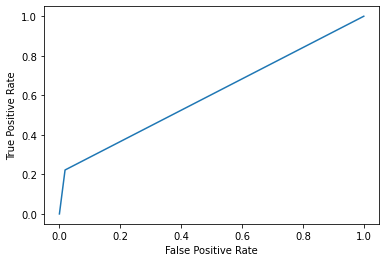

In [180]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Model yang baik adalah model yang mendekati ke arah pojok kiri dari plot. Jika dilihat dari plot di atas, model terlihat kurang bagus daripada model ebelumnya.

Untuk menjadikan kuantitas, lakukan kalkulasi AUC untuk mencari seberapa banyak plot yang ada di bawah kurva.

---
### Kalkulasi AUC

Model yang baik adalah model yang memiliki AUC mendekati 1. (Source: https://www.statology.org/plot-roc-curve-python/)

Klasifikasi AUC adalah:

- 0.5 = No discrimination
- 0.5-0.7 = Poor discrimination
- 0.7-0.8 = Acceptable discrimination
- 0.8-0.9= Excellent discrimination
- lebih dari 0.9 = Outstanding discrimination

In [181]:
auc = metrics.roc_auc_score(y_test, y_pred_test_xgb)

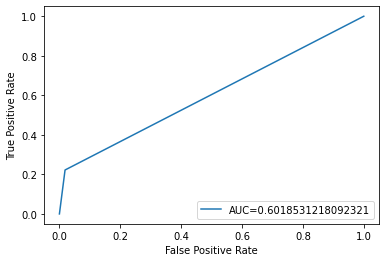

In [182]:
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

---
### Cross Validation

In [183]:
scores_xgb = (cross_val_score(model_xgb, X_train_final, y_train, scoring="f1", cv = 10))
mean_score_xgb = cross_val_score(model_xgb, X_train_final, y_train, scoring="f1", cv = 10).mean()
std_score_xgb = cross_val_score(model_xgb, X_train_final, y_train, scoring="f1", cv = 10).std()
print("Scores: ", scores_xgb)
print("Mean: ", mean_score_xgb)
print("Standard deviation: " ,std_score_xgb)

Scores:  [0.36501901 0.35185185 0.33460076 0.3992467  0.42561205 0.41544118
 0.36647173 0.36121673 0.35728155 0.36470588]
Mean:  0.37414474579295154
Standard deviation:  0.027798982365705046


Dapat dilihat dari score cross validation bahwa nilainya berada di rentang 0.3741 ± 0.0277.

Akan tetapi, cukup banyak score yang berada di luar rentang tersebut. Sehingga diasumsikan model ini kurang bagus.

---
## Menentukan Model

Untuk menentukan model yang terbaik, kita cek terlebih dahulu tingkat skewness target.

In [184]:
y_train.skew()

2.459534169979004

In [189]:
y_train.value_counts()

0    29250
1     3692
Name: y_bool, dtype: int64

In [190]:
y_train.value_counts()/len(y_train)

0    0.887924
1    0.112076
Name: y_bool, dtype: float64

Dapat dilihat dari data di atas jika y_train ternyta skew dan jumlah label 0 jauh lebih besar daripada label 1. Jadi yang akan digunakan adalah model dengan AUC terbesar yaitu KNN dengn nilai 0.632.

---
## Conclusion

- Menurut pengamatan, model yang bisa dilanjutkan untuk tuning adalah KNN.

- Pemilihan dilakukan berdasarkan nilai AUC tertinggi karena target imbalance.

# 8.2 - GridSearch & Hyperparameter Tuning

GridSearch dan Hyperparameter Tuning dilakukan untuk mendapatkan model terbaik dengan mencari hyperparameter yang optimal.

Hal pertama yang dilakukan adalah menentukan nilai hyperparameter secara random.

In [191]:
leaf_size = [10, 15, 30, 45, 50]
n_neighbors = [ 5, 10, 15, 20, 25]
p=[1,2]
params = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

Selanjutnya kita definisikan parameter range.

In [192]:
grid = GridSearchCV(estimator = model_knn,
                    param_grid = params, 
                    cv=5, scoring='accuracy', return_train_score=False,verbose=1)
grid_search = grid.fit(X_train_final, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


Kita cek apa parameter terbaiknya dan berapa skornya.

In [193]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'leaf_size': 10, 'n_neighbors': 20, 'p': 1}
Accuracy for our training dataset with tuning is : 90.12%


Jadi, parameter KNN  dengan parameter di atas adalah adalah leaf size: 10, n neighbors: 20 dan p: 1.

Selanjutnya buat model baru yang sudah di-tuned.

In [195]:
model_knn_tuned = KNeighborsClassifier(leaf_size=10, n_neighbors=20, p=1)
model_knn_tuned.fit(X_train_final, y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=20, p=1)

---
## Model Evaluation Tuned Model

Akurasi model adalah 90.12%. Selanjutnya kita cek nilai confusion matriksnya.

In [196]:
y_pred_train_knn_tuned = model_knn_tuned.predict(X_train_final)
y_pred_test_knn_tuned = model_knn_tuned.predict(X_test_final)

In [197]:
cm_knn_tuned = metrics.confusion_matrix(y_test, y_pred_test_knn_tuned)
print(cm_knn_tuned)

[[7132  159]
 [ 696  249]]


In [198]:
TPkt = 7132
TNkt = 249
FPkt = 159
FNkt = 696

Jadi nilai confusion matriksnya adalah:

- True Positive : 7132
- True Negative :  249
- False Positive:  159
- False Negative:  696

In [199]:
data_true = TPkt + TNkt
data_false = FPkt + FNkt
print('Jadi ada ' , data_true, ' data dengan prediksi benar dan ', data_false, ' data dengan prediksi salah.')

Jadi ada  7381  data dengan prediksi benar dan  855  data dengan prediksi salah.


---
### Precission

Precision didefinisikan sebagai ratio antara data positif yang berhasilkan ditemukan dan dibandingkan dengan semua data positif(baik yang benar maupun yang salah).

Rumus untuk mencari Precission adalah:

Precision = True Positive/True Positive + False Positive

Precision = TP/TP+FP

In [200]:
precission = TPkt/(TPkt + FPkt)
print('Tingkat precission Decission Tree adalah: ', precission)

Tingkat precission Decission Tree adalah:  0.978192291866685


Model KNN Tuned memiliki tingkat precission sebesar 0.97  atau berhasil menebak hasil positif sebesar 97%.

---
### Recall

Recall didefinisikan sebagai data positif yang berhasil ditemukan dan dibandingkan dengan jumlah total data positif (true positive dan false negative).

Recall mengukur kemampuan model untuk melakukan deteksi terhadap sample positif.

Rumus untuk mencari Recall adalah;

Recall = True Positive/True Positive + False Negative

Recall = TP/TP+FN

In [201]:
recall = TPkt/(TPkt + FNkt)
print('Tingkat recall Decission Tree adalah: ', recall)

Tingkat recall Decission Tree adalah:  0.9110884006131834


Model KNN Tuned memiliki tingkat precission sebesar 0.91  atau berhasil menebak dengan benar sebesar 91%.

---
### ROC Curve

In [202]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_test_knn_tuned)

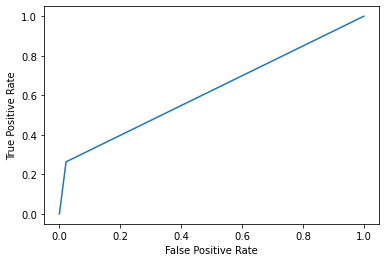

In [203]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Agar bisa dibandingkan dengan hasil yang belum di-tuning, kita kalkulasi AUC-nya.

---
### Kalkulasi AUC

Model yang baik adalah model yang memiliki AUC mendekati 1. (Source: https://www.statology.org/plot-roc-curve-python/)

Klasifikasi AUC adalah:

- 0.5 = No discrimination
- 0.5-0.7 = Poor discrimination
- 0.7-0.8 = Acceptable discrimination
- 0.8-0.9= Excellent discrimination
- lebih dari 0.9 = Outstanding discrimination

In [204]:
auc = metrics.roc_auc_score(y_test, y_pred_test_knn_tuned)

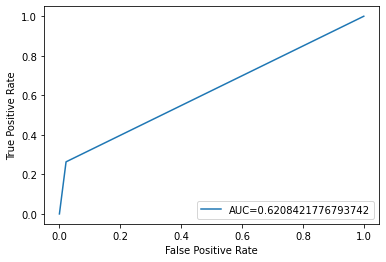

In [205]:
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Ternyata AUC sedikit lebih rendah daripada yang default. Di mana nilai AUC pada KNN default berada di 0.632.

---
### Cross Validation

In [206]:
scores_knn_tuned = (cross_val_score(model_knn_tuned, X_train_final, y_train, scoring="f1", cv = 10))
mean_score_knn_tuned = cross_val_score(model_knn_tuned, X_train_final, y_train, scoring="f1", cv = 10).mean()
std_score_knn_tuned = cross_val_score(model_knn_tuned, X_train_final, y_train, scoring="f1", cv = 10).std()
print("Scores: ", scores_knn_tuned)
print("Mean: ", mean_score_knn_tuned)
print("Standard deviation: " ,std_score_knn_tuned)

Scores:  [0.35087719 0.34535104 0.36015326 0.42725599 0.3908046  0.40831758
 0.36772983 0.36711281 0.38113208 0.34939759]
Mean:  0.3748131964324216
Standard deviation:  0.02565098548917365


Dapat dilihat dari score cross validation bahwa nilainya berada di rentang 0.3748 ± 0.0256

Selanjutnya mari kita bandingkan hasil model inference.

---
# 9 - Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [210]:
data_inf

,contact,previous,poutcome,euribor3m,nr.employed,y_bool
0,cellular,4,success,0.877,4963.6,1
1,cellular,1,failure,0.873,5076.2,0
2,telephone,0,nonexistent,4.857,5191.0,0
3,telephone,0,nonexistent,4.859,5191.0,1
4,cellular,0,nonexistent,4.191,5195.8,0
5,cellular,0,nonexistent,4.120,5195.8,0
6,cellular,0,nonexistent,1.244,5099.1,1
7,telephone,0,nonexistent,4.855,5191.0,0
8,telephone,0,nonexistent,0.748,4991.6,0
9,cellular,1,success,1.365,5099.1,0


Scaling dan encoding data_inf.

In [207]:
data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[cat_columns]

In [208]:
data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_cat_enc = pd.DataFrame(encoder.transform(data_inf_cat[['contact', 'poutcome']]).toarray())
data_inf_cat_enc.columns = ['contact_cellular', 'contact_telephone', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']
data_inf_cat_enc

,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,1.0,0.0
6,1.0,0.0,0.0,1.0,0.0
7,0.0,1.0,0.0,1.0,0.0
8,0.0,1.0,0.0,1.0,0.0
9,1.0,0.0,0.0,0.0,1.0


Merge data numerical dan categorical

In [211]:
data_inf_final =  np.concatenate([data_inf_num_scaled, data_inf_cat_enc], axis=1)
data_inf_final_df = pd.DataFrame(data_inf_final, columns=[num_columns + cat_final_columns])
data_inf_final_df

,previous,euribor3m,nr.employed,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.571429,0.055090,0.000000,1.0,0.0,0.0,0.0,1.0
1,0.142857,0.054183,0.425709,1.0,0.0,1.0,0.0,0.0
2,0.000000,0.957379,0.859735,0.0,1.0,0.0,1.0,0.0
3,0.000000,0.957833,0.859735,0.0,1.0,0.0,1.0,0.0
4,0.000000,0.806393,0.877883,1.0,0.0,0.0,1.0,0.0
5,0.000000,0.790297,0.877883,1.0,0.0,0.0,1.0,0.0
6,0.000000,0.138291,0.512287,1.0,0.0,0.0,1.0,0.0
7,0.000000,0.956926,0.859735,0.0,1.0,0.0,1.0,0.0
8,0.000000,0.025844,0.105860,0.0,1.0,0.0,1.0,0.0
9,0.142857,0.165722,0.512287,1.0,0.0,0.0,0.0,1.0


Lakukan prediksi terhadap KNN default

In [212]:
y_pred_inf_knn = model_knn.predict(data_inf_final)
y_pred_inf_knn_df = pd.DataFrame(y_pred_inf_knn, columns=['y-KNN_Default_Prediction'])
y_pred_inf_knn_df

,y-KNN_Default_Prediction
0,1
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


Lakukan prediksi terhadap KNN tuned

In [213]:
y_pred_inf_knn_tuned = model_knn_tuned.predict(data_inf_final)
y_pred_inf_knn_tuned_df = pd.DataFrame(y_pred_inf_knn_tuned, columns=['y-KNN_Tuned_Prediction'])
y_pred_inf_knn_tuned_df

,y-KNN_Tuned_Prediction
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1


In [214]:
pd.concat([data_inf, y_pred_inf_knn_df, y_pred_inf_knn_tuned_df], axis=1)

,contact,previous,poutcome,euribor3m,nr.employed,y_bool,y-KNN_Default_Prediction,y-KNN_Tuned_Prediction
0,cellular,4,success,0.877,4963.6,1,1,0
1,cellular,1,failure,0.873,5076.2,0,0,0
2,telephone,0,nonexistent,4.857,5191.0,0,0,0
3,telephone,0,nonexistent,4.859,5191.0,1,0,0
4,cellular,0,nonexistent,4.191,5195.8,0,0,0
5,cellular,0,nonexistent,4.120,5195.8,0,0,0
6,cellular,0,nonexistent,1.244,5099.1,1,0,0
7,telephone,0,nonexistent,4.855,5191.0,0,0,0
8,telephone,0,nonexistent,0.748,4991.6,0,0,0
9,cellular,1,success,1.365,5099.1,0,0,1


Ternyata hasil prediksi KNN default lebih akurat daripada KNN yang sudah di-tuned.

Jika mengacu pada nilai AUC-nya, memang model yang sudah di-tuned memiliki nilai yang lebih rendah daripada yang default.

Kedepannya, tuning model bisa dilakukan lebih mendalam dengan menggunakan hyperparameter yang berbeda dan dengan value yang lebih variatif.

---
# 10 - Kesimpulan

- Dataset yang digunakan adalah bamk-additional-full.csv yang berisi tentang data perbankan.

- Dataset tidak memiliki missing value.

- Target adalah kolom 'y'.

- Outlier melebihi batas toleransi sehingga di-ignore.

- Feature yang diambil adalah 'contact', 'previous', 'poutcome', 'euribor3m', 'nr.employed'.

- Data numerik discaling dengan MinMaxScaler karena ada beberapa data yang skew.

- Data categorical diencode dengan OneHotEncoder karena bukan merupakan data ordinal.

- Ada 7 model yang digunakan yaitu Logistic Regression, SVM, Decission Tree, Random Forest, KNN, Naive Bayes dan XGBoost.

- Model terbaik adalah KNN dengan membandingkan nilai AUC dari model default karena data target imbalance.

- Dilakukan gridsearch untuk mendapatkan hyperparameter terbaik. Hyperparameter tersebut adalah leaf size: 10, n neighbors: 20 dan p: 1.

- Ketika menggunakan data inference, ternyata hasil yang default lebih baik daripada yang di-tuned.

- Jika mengacu pada nilai AUC-nya, memang model yang sudah di-tuned memiliki nilai yang lebih rendah daripada yang default.

- Kedepannya, tuning model bisa dilakukan lebih mendalam dengan menggunakan hyperparameter yang berbeda dan dengan value yang lebih variatif.